<div id="container" style="position:relative;">
<div style="float:left">

***Kazi Shahid***

***BrainStation Data Science Diploma Candidate***

***Capstone Project***

=============================================================

***Project SteamBuzz: Will Our Game Create a Buzz in the Steam community?***

***Part 3: Exploratory Data Analysis and Data Preparation***
</div>
<div style="position:relative; float:right"><img style="height:100px" src ="https://i.ibb.co/mcvpL4Z/Steam-Buzz-logo.png" />
</div>
</div>

---
# Overview

In this part of the project, we will perform some necessary initial exploratory data analysis ("EDA") followed by data wrangling to address any issues in the data. As such text datasets are content-heavy in their raw form, we'll clean up and process the data into much lighter form without losing much of the value/meaning and into document-term matrices so that our machine can read and analyze it. We will perform some additional EDA based on the cleaned up data, prepare the data for modelling, and export the matrices into a file for use as an input for our ML classifiers in the next parts of the project.

---
# Exploratory Data Analysis (#1 of 2)

Before performing any analysis, we need to explore the data, summarize the main characteristics, and take a deeper dive for getting familiar with the data and identifying trends, patterns, etc. This way, we can effectively chart the way forward into data modelling for this particular dataset.

We first load the dataset obtained at the end of Part 2 of the project and import the necessary packages for our analysis. We then check the first few rows to confirm that the data loaded successfully.

In [152]:
# Importing the necessary data analysis and visualization toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To display ALL the columns in the dataframes
pd.options.display.max_columns=None

# To display the full content of each column of the dataframes
pd.set_option('display.max_colwidth', None)

# Filtering out potential warnings
import warnings
warnings.filterwarnings('ignore')

In [153]:
# Importing the primary dataset from its csv file into a Pandas DataFrame form
df = pd.read_csv("data\steam_review_strategy_pt2.csv")

In [154]:
# Checking that the Dataset loaded correctly, displaying the first 5 rows of the Dataset
print(f"Top 5 rows of the dataset:")
df.head()

Top 5 rows of the dataset:


,steam_id,title,review_text,recommended,num_helpful
0,102600,Orcs Must Die!,"This is a game about killing orcs. The concept is simple enough, but the execution is high quality. The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose. One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you'll have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal. At the start of each level you'll have time to plan and set up your defenses and get a feel for the layout of the area. You'll be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door. This is important because, despite the simple premise of 'orcs must die,' this is really a tactician's game. The first few levels you may be able to survive using just your crossbow, but as the difficulty level increases you will have to diversify your tactics or perish. You'll start facing more orcs, tougher monsters, monsters that come from multiple entrances, and even multiple rifts that must be defended simultaneously. I will give one bit of warning that is not mentioned in the game-- if you intend to play on the default (war mage) difficulty level as I did, in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift, you've also got to do it within the par time. Once you start the initial wave the timer starts, and it doesn't stop even during the 'break' periods you sometimes get between waves. The game is single player only. The graphics and music are adequate, but not AAA quality (this is an indie game, after all, and I don't expect AAA quality here). There is a storyline which is short, simple, and entertaining. Borderlands fans will recognize the voice of Axton the Commando as the War Mage. If you like third person shooters or defense-centered gameplay you'll like Orcs Must Die!",1,0
1,102600,Orcs Must Die!,"Orcs Must Die! is a fun and simple tower defense game: - Casual and easy to learn: you can play for less than an hour and still have fun! - Lots of different orcs to kill: melee orcs, range orcs, flying orcs, etc. - Lots of different ways to kill orcs: weapons, powers, traps, and guardians",1,0
2,102600,Orcs Must Die!,"Single-player tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place. If you do play this game, do so with the knowledge that you are a terrible person who willingly makes enemies walk into spike-traps, get grinded up into goo, and catapulted into lava pits. Enjoy the murder! :P",1,1
3,102600,Orcs Must Die!,"Nice polished fun TD/3PS. Got to finish it sometime. High quality game for cheap, what's not to like?",1,0
4,102600,Orcs Must Die!,"Here we have a very fun game, but it can get you very angry when you try to complete it perfectly. I completed with multiple rage quits. The proposal is simple, tower defense, prevent the orcs from reaching the portal, there are different types of enemies with different behaviors. The fun is to develop a strategy with the available traps, exploring the scenario in order to exterminate all. The vision in the third person possibility you to actively participate in the struggle, something different in these types of games. With a fun and intuitive gameplay, the graphics also pleases with his cartoonish appearance, the sound of stacks of orcs being crushed and torn is comforting. The plot is simple, just an excuse to kill orcs in many ways. 7.5/10",1,0


## Shape of the Dataset

We now check the "shape" i.e. the number of rows and columns in the Dataset.

In [155]:
# Displaying the total number of rows and columns in the dataset (with thousand separators)
print(f"Total number of rows in the strategy game review data: {len(df):,}")
print(f"Total number of columns in the strategy game review data: {len(df.columns):,}")

Total number of rows in the strategy game review data: 1,302,523
Total number of columns in the strategy game review data: 5


Therefore there are 1,302,523 unique instances of review for the strategy games under the scope of the Dataset and 5 dimensions of information for the reviews.

## Column Types: Numeric vs. Non-numeric

### Current Categorization

Below is a list of all columns and a brief description regarding whether each column is numeric or non-numeric.

In [156]:
print(f"Non-numeric columns: {df.select_dtypes('object').columns.tolist()}")
print(f"Numeric columns: {df.select_dtypes(exclude=['object']).columns.tolist()}")

Non-numeric columns: ['title', 'review_text']
Numeric columns: ['steam_id', 'recommended', 'num_helpful']


1. `steam_id` column: This column is **numeric** (integers) as it provides the unique ID for each game being reviewed.


2. `review_text` column: This column is **non-numeric** (string) as it contains the full text of the review in each row.


3. `recommended` column: This column is **numeric** (integers) as it provides the rating the reviewer has given related to their stay.
    * If the reviewer recommended the game as part of their review, it is represented by a `1` value.
    * If the reviewer did not recommend the game as part of their review, it is represented by a `-1` value.


4. `num_helpful` column: This column is **numeric** (integers) as it supposedly shows the number of Steam users who found the review helpful.
    * This column takes a bit unusual set of values as, given the data this column is supposed to contain, it should have come with a range of integer values. However, a quick scan reveals that it only seemingly contains only `1` and `0` values. Further detailed review will be undertaken in Sec. 2 below.

## Data Types of the Columns

Now we look further into the data types the Dataset takes for each of its column:

In [157]:
# Checking data type for each column
pd.DataFrame(df.dtypes, columns=["Data Type"])

,Data Type
steam_id,int64
title,object
review_text,object
recommended,int64
num_helpful,int64


As we can see from above:

- `steam_id` column takes integer values, which is the correct data type for this column.
      - Considering the Steam IDs can go to the millions, `int64` can be kept.


- `review_text` column takes string values, which is the correct data type for this column.


- `recommended` column takes integer values, which is the correct data type for this column.
      - Considering this column should only take two of the smallest values, we can convert the data type from `int64` 
      (which can range from -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807) to `int8` (which can range from -128 to 127) in order to save memory.
    
    
- `num_helpful` column takes integer values, which is the correct data type for this column.
      - Considering this column should only take two of the smallest values, we can also convert the data type of this 
      column from `int64` to `int8` for the same reason as above.

## Numeric Review Score Values in the `recommended` Column

Our prime feature of interest in the Dataset is the review scores. Ultimately, we want to process and analyze the Dataset and run modeling with a view to predicting sentiment, which is essentially the review scores in a slightly different form.

Predicting the sentiment means we will try to predict whether a review will be positive or negative, i.e. we will deal less with scale form and more with discrete form of the reviews.

Let us first confirm the current format and range of the review scores, and the unique values of the review scores (to check their increment sizes, for example) -

In [158]:
# Listing all unique values that the 'recommended' column contains
print(f"List of all values the 'recommended' column contains: {df['recommended'].unique()}")

List of all values the 'recommended' column contains: [ 1 -1]


So we see that the `recommended` column contains only `1` or `-1` values, representing whether a game was "Recommended" or "Not Recommended" in each review.

As we can see, this column is already binarized, therefore not needing to be binned as in the case of an N-point rating scale (e.g., a 5-point rating scale would be "Highly recommended - Somewhat recommended - Neutral - Somewhat not recommended - Not recommended at all", etc.) in order to, say, create target classes that will have balanced distribution.

However, we will still convert `-1` to `0` so that our model can recognize and process the data best. We do so in a section further below.

## Distribution of Review Scores in the `recommended` Column

Now we look at how the review scores in the `recommended` column are distributed.

In [159]:
# Counting total no. of positive and negative reviews
print(f"Total count of positive reviews: {len(df[df['recommended']==1]):,}")
print(f"Total count of negative reviews: {len(df[df['recommended']==-1]):,}")

Total count of positive reviews: 1,069,035
Total count of negative reviews: 233,488


The above two numbers total 3,723,706, which is the total number of rows as we checked earlier.

Now we plot the distribution of positive and negative reviews:

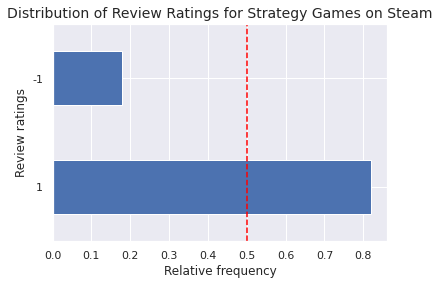

In [160]:
# Plotting the relative frequency distribution graph for the review ratings

## Calculating the relative frequency (i.e., normalizing) for each class of review ratings in the 'recommended' column
## Specifying that the chart will be a horizontal bar chart (i.e., the "barh" kind)
df['recommended'].value_counts(normalize=True).plot(kind='barh')

## Adding a dashed line along 50% relative frequency to denote the perfect balance line
plt.axvline(0.50, color="red", linestyle="--")

## Adding an appropriate X-axis label
plt.xlabel("Relative frequency", fontsize=12)

## Adding an appropriate Y-axis label
plt.ylabel("Review ratings", fontsize=12)

## Adding a title to the plot
plt.title("Distribution of Review Ratings for Strategy Games on Steam", fontsize=14);

As we can see, there is severe class imbalance, with over 80% of the reviews being recommending the games being reviewed and the remaining less-than-20% of the reviews not recommending the games being reviewed. As the ultimate objective of this project is to implement the appropriate machine learning algorithms, such class imbalance issues will impede reaching that objective as, under most machine learning algorithms' assumption that the data are equally distributed, the machine learning classifier will be biased towards the majority class.

There are a few approaches to address this class imbalance issue, of which upsampling/downsampling is a common and popular method. We address this class imbalance issue later in this deliverable.

## Numeric Values in the `num_helpful` Column

This column was supposed to present the number of users who voted a review as helpful, so we would expect a range of positive integer values in this column. However, as we can see, there are only `0` and `1` values in here (likely due to a data extraction error), and we cannot reliably collate the correct values for this column. As this column is not of much help for our purpose, we will remove it below.

---
# Data Wrangling & Clean-up

With the initial EDA done, we can move on to cleaning up the data.

## Addressing the `num_helpful` Column

As discussed above, we will remove the `num_helpful` column as it does not contain the useful information it was originally supposed to have and therefore serves no useful purpose for the project.

In [161]:
# Dropping the `num_helpful` column
df.drop('num_helpful', axis=1, inplace=True)

## Addressing Data Type for the Columns

As observed in the [data type discussion section above](#Data-Types-of-the-Columns), we need to convert the `recommended` column's data type from `int64` to `int8`. We check if the conversion is successful -

In [162]:
# Converting the 'recommended' column's data type from int64 to int8
print("The 'recommended' column after converting from int64 to int8:")
df['recommended'].astype(np.int8)

The 'recommended' column after converting from int64 to int8:


0          1
1          1
2          1
3          1
4          1
          ..
1302518   -1
1302519   -1
1302520   -1
1302521   -1
1302522   -1
Name: recommended, Length: 1302523, dtype: int8

## Binary-encoding the `recommended` Column

In order to make this data digestible for our models later, we will binary-encode the values in this column to `0` (from -1) and `1`.

In [163]:
# Converting all '-1' ratings to '0', keeping the remaining values as '1' (i.e., as they were before)
df['recommended'] = np.where(df['recommended'] == -1, 0, 1)

# Checking the Dataset after the above binary-encoding
df.head()

,steam_id,title,review_text,recommended
0,102600,Orcs Must Die!,"This is a game about killing orcs. The concept is simple enough, but the execution is high quality. The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose. One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you'll have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal. At the start of each level you'll have time to plan and set up your defenses and get a feel for the layout of the area. You'll be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door. This is important because, despite the simple premise of 'orcs must die,' this is really a tactician's game. The first few levels you may be able to survive using just your crossbow, but as the difficulty level increases you will have to diversify your tactics or perish. You'll start facing more orcs, tougher monsters, monsters that come from multiple entrances, and even multiple rifts that must be defended simultaneously. I will give one bit of warning that is not mentioned in the game-- if you intend to play on the default (war mage) difficulty level as I did, in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift, you've also got to do it within the par time. Once you start the initial wave the timer starts, and it doesn't stop even during the 'break' periods you sometimes get between waves. The game is single player only. The graphics and music are adequate, but not AAA quality (this is an indie game, after all, and I don't expect AAA quality here). There is a storyline which is short, simple, and entertaining. Borderlands fans will recognize the voice of Axton the Commando as the War Mage. If you like third person shooters or defense-centered gameplay you'll like Orcs Must Die!",1
1,102600,Orcs Must Die!,"Orcs Must Die! is a fun and simple tower defense game: - Casual and easy to learn: you can play for less than an hour and still have fun! - Lots of different orcs to kill: melee orcs, range orcs, flying orcs, etc. - Lots of different ways to kill orcs: weapons, powers, traps, and guardians",1
2,102600,Orcs Must Die!,"Single-player tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place. If you do play this game, do so with the knowledge that you are a terrible person who willingly makes enemies walk into spike-traps, get grinded up into goo, and catapulted into lava pits. Enjoy the murder! :P",1
3,102600,Orcs Must Die!,"Nice polished fun TD/3PS. Got to finish it sometime. High quality game for cheap, what's not to like?",1
4,102600,Orcs Must Die!,"Here we have a very fun game, but it can get you very angry when you try to complete it perfectly. I completed with multiple rage quits. The proposal is simple, tower defense, prevent the orcs from reaching the portal, there are different types of enemies with different behaviors. The fun is to develop a strategy with the available traps, exploring the scenario in order to exterminate all. The vision in the third person possibility you to actively participate in the struggle, something different in these types of games. With a fun and intuitive gameplay, the graphics also pleases with his cartoonish appearance, the sound of stacks of orcs being crushed and torn is comforting. The plot is simple, just an excuse to kill orcs in many ways. 7.5/10",1


In [164]:
# Printing the list of all values in the 'recommended' column
print(f"List of all values the 'recommended' column contains: {df['recommended'].unique()}")

List of all values the 'recommended' column contains: [1 0]


As the `recommended` column now has only `1` and `0` values, the conversion is successful.

## Addressing Missing Values

First, we check what proportion of values are missing in each column:

In [165]:
# Counting the total missing values under each column in the sample
pd.DataFrame(round(df.isnull().sum()/len(df)*100,2), columns=["Fraction of Missing Values (%)"])

,Fraction of Missing Values (%)
steam_id,0.00
title,0.00
review_text,0.11
recommended,0.00


As we can see, only the `review_text` column have some missing values, likely meaning that a user provided ratings ("recommended"/"not recommended") but did not provide any descriptive reviews to go with those ratings. We can go ahead and drop these rows as:
- These rows constitute a minuscule portion (only about 0.11%) of the rows, and
- Most importantly, we cannot perform our NLP (sentiment analysis, topic modelling, etc.) in absence of review text for any given review.

After executing the dropping of the aforementioned rows, we re-check the shape of the dataset:

In [166]:
# Dropping the rows with missing values
df = df.dropna()

# Resetting index after dropping the above rows
df = df.reset_index(drop=True)

# Checking the shape of the dataframe
print(f"Total number of reviews in the dataset after dropping the rows with blank text reviews: {len(df):,}")

Total number of reviews in the dataset after dropping the rows with blank text reviews: 1,301,074


## Addressing Duplicative Rows

Sometimes due to data entry error or some other errors, we come across rows that are duplicated. This means these rows get twice the deserved weight and can skew the results. We need to check for and address these cases.

As we are certain from the column contents that there cannot be duplicative columns, let us check if any rows are duplicates -

### Checking for Duplicative Rows

In [167]:
# Checking for duplicative rows in the dataset
print(f"Duplicated rows in terms of review text: {df.duplicated().any()}")

Duplicated rows in terms of review text: True


So there seems to be some duplicative rows in the dataset. Let us count how many there are -

In [168]:
# Returning total number of duplicative row
print(f"Number of duplicated rows in the review dataset: {df.duplicated().sum():,}")

Number of duplicated rows in the review dataset: 414,168


In [169]:
# Creating a subset of the dataset including only the duplicated rows for efficiency in further exploring the duplicated rows
df_dupli = df[df.duplicated(keep=False)]

In [170]:
# For ease of checking some duplicate rows among so many, returning an array of steam IDs that had duplicate rows so we can check one/few
print(f"No. of games with duplicate reviews: {df_dupli['steam_id'].nunique()}")
print(f"List of steam IDs of games having duplicate reviews: {df_dupli['steam_id'].unique()}")

No. of games with duplicate reviews: 1281
List of steam IDs of games having duplicate reviews: [102600 104000 104100 ...  98900  99700  99910]


Since there are so many, we will pick one game from the above steam ID list and check its duplicate reviews. Let us take, for example, steam ID # 10130, the duplicate reviews of which are:

In [171]:
# Picking one game identified with duplicate reviews and checking its duplicate reviews
df_dupli[df_dupli['steam_id']==104000]

,steam_id,title,review_text,recommended
2440,104000,iBomber Defense,I find this game to be rather boring. Even on fast forward the waves can take way too long. It just isn't really all that fun.,0
2441,104000,iBomber Defense,I find this game to be rather boring. Even on fast forward the waves can take way too long. It just isn't really all that fun.,0
2467,104000,iBomber Defense,"This game is very addictive. Maybe its the sound effects, maybe its the blowing up of stuff, i dunno but its definitely fun :-)",1
2468,104000,iBomber Defense,"This game is very addictive. Maybe its the sound effects, maybe its the blowing up of stuff, i dunno but its definitely fun :-)",1


For the above, the duplicate reviews are indeed duplicates, with two rows of texts exactly matching each other. We see that these reviews are in consecutive rows (or at least very close to each other), which may point to the possibility of the user submitting the same review at the same timeframe (perhaps the user submitted the review once, was returned with an error, and re-submitted, but both reviews ended up getting through).

### Removing Duplicative Rows

With so many reviews at our disposal, we can safely drop rows identified as duplicates, where exactly same review text occurred for the same game.

In [172]:
# Dropping the duplicate rows, keeping only the first instance for each
df = df.drop_duplicates(keep="first", inplace=False)

In [173]:
# Displaying the total number of rows and positive and negative reviews in the dataset after dropping the duplicate rows
print("After removing duplicate reviews,")
print(f"\t Total number of rows in the strategy game review data after removing duplicate reviews: {len(df):,}")
print(f"\t Total count of positive reviews: {len(df[df['recommended']==1]):,}")
print(f"\t Total count of negative reviews: {len(df[df['recommended']==0]):,}")

After removing duplicate reviews,
	 Total number of rows in the strategy game review data after removing duplicate reviews: 886,906
	 Total count of positive reviews: 713,440
	 Total count of negative reviews: 173,466


## Addressing Non-text Elements in Review Text

Gamers are fond of symbols a lot of times. Some other times the reviews are just popular memes or pictures that are copy-pasted. In any case, these symbols are least likely to convey sentiment that is recognizable by machines (in many cases, humans too). To make a clean text set to work with, we may need to clean up some text having too many non-text characters that may not provide meaning to be digested by our models.

### Calculating Percentage of Non-text Elements in Review Text

First, we check how much of non-text elements exist in the full length of characters in the review text.

In [174]:
# Calculating character length for each review
df['char_len'] = df['review_text'].apply(lambda x: len(x) - x.count(" "))

# Printing the top few rows to look at the newly-created charcter-length column
df.head()

,steam_id,title,review_text,recommended,char_len
0,102600,Orcs Must Die!,"This is a game about killing orcs. The concept is simple enough, but the execution is high quality. The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose. One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you'll have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal. At the start of each level you'll have time to plan and set up your defenses and get a feel for the layout of the area. You'll be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door. This is important because, despite the simple premise of 'orcs must die,' this is really a tactician's game. The first few levels you may be able to survive using just your crossbow, but as the difficulty level increases you will have to diversify your tactics or perish. You'll start facing more orcs, tougher monsters, monsters that come from multiple entrances, and even multiple rifts that must be defended simultaneously. I will give one bit of warning that is not mentioned in the game-- if you intend to play on the default (war mage) difficulty level as I did, in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift, you've also got to do it within the par time. Once you start the initial wave the timer starts, and it doesn't stop even during the 'break' periods you sometimes get between waves. The game is single player only. The graphics and music are adequate, but not AAA quality (this is an indie game, after all, and I don't expect AAA quality here). There is a storyline which is short, simple, and entertaining. Borderlands fans will recognize the voice of Axton the Commando as the War Mage. If you like third person shooters or defense-centered gameplay you'll like Orcs Must Die!",1,1812
1,102600,Orcs Must Die!,"Orcs Must Die! is a fun and simple tower defense game: - Casual and easy to learn: you can play for less than an hour and still have fun! - Lots of different orcs to kill: melee orcs, range orcs, flying orcs, etc. - Lots of different ways to kill orcs: weapons, powers, traps, and guardians",1,235
2,102600,Orcs Must Die!,"Single-player tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place. If you do play this game, do so with the knowledge that you are a terrible person who willingly makes enemies walk into spike-traps, get grinded up into goo, and catapulted into lava pits. Enjoy the murder! :P",1,312
3,102600,Orcs Must Die!,"Nice polished fun TD/3PS. Got to finish it sometime. High quality game for cheap, what's not to like?",1,84
4,102600,Orcs Must Die!,"Here we have a very fun game, but it can get you very angry when you try to complete it perfectly. I completed with multiple rage quits. The proposal is simple, tower defense, prevent the orcs from reaching the portal, there are different types of enemies with different behaviors. The fun is to develop a strategy with the available traps, exploring the scenario in order to exterminate all. The vision in the third person possibility you to actively participate in the struggle, something different in these types of games. With a fun and intuitive gameplay, the graphics also pleases with his cartoonish appearance, the sound of stacks of orcs being crushed and torn is comforting. The plot is simple, just an excuse to kill orcs in many ways. 7.5/10",1,625


Now, we will calculate the length of non-text characters in the reviews.

In [175]:
# Calculating the length of non-text characters in the reviews
df['nontextchar_len'] = df.apply(lambda p: sum( not (q.isalnum()) for q in p['review_text'] ) , axis=1)\
                        - df['review_text'].apply(lambda x: x.count(" "))

# Calculating the % of non-text characters in the whole length of the reviews
df['nontextchar_pct'] = df['nontextchar_len'] / df['char_len']

Let us look at some rows to see if it worked:

In [176]:
# Printing certain consecutive rows
df.iloc[800117:800124,:]

,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
1179233,570,Dota 2,internationally world best of best game dota dota dota !!!!!!!!!!!!!!!! &lt;-.-&gt;,1,73,23,0.315068
1179235,570,Dota 2,"good game, good luck for officer :)",1,29,3,0.103448
1179240,570,Dota 2,what a great game :D EVER !!!,1,23,4,0.173913
1179241,570,Dota 2,Let's play DOTA 2!,1,15,2,0.133333
1179242,570,Dota 2,Very fun game even though it might make you jump out of your chair and want to strangle a guy. Other then those rage enducing moments it is very fun along with friends unless they are wimps and run at the sight of a almost dead chicken.,1,190,2,0.010526
1179243,570,Dota 2,"Dota is a nice game, i luv this game !",1,29,2,0.068966
1179244,570,Dota 2,All the cool kids are playing it,1,26,0,0.000000


### Cleaning the Review Text for Non-text Elements

First, we look at how it is distributed, in order to determine a cutoff point for the `symbol_pct` above which we will consider that the review text is not that meaningful]

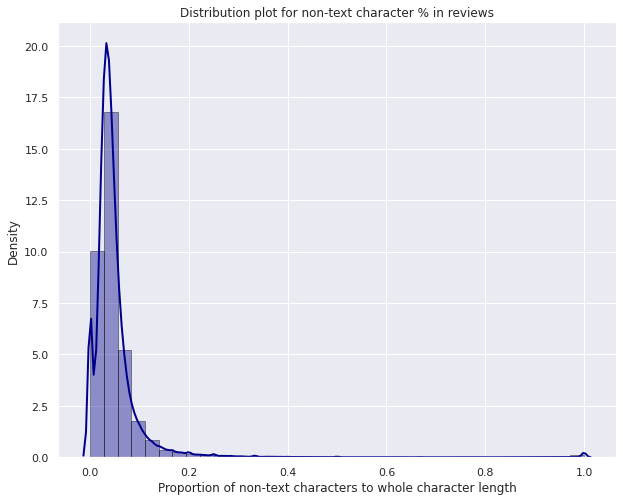

In [177]:
# Plotting distribution for the non-text elements %

sns.set(rc={'figure.figsize':(10, 8)})

sns.distplot(df['nontextchar_pct'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             axlabel="Proportion of non-text characters to whole character length",
             kde_kws={'linewidth': 2}).set_title("Distribution plot for non-text character % in reviews");

We see that very tiny percentage exists now, and gets even less frequent as the percentage increases.

In [178]:
# Counting data points with more than 50% non-text elements
df[df['nontextchar_pct'] > 0.50].count() / len(df)

steam_id           0.0041
title              0.0041
review_text        0.0041
recommended        0.0041
char_len           0.0041
nontextchar_len    0.0041
nontextchar_pct    0.0041
dtype: float64

Let us look at some reviews that are almost-entirely composed of special characters, to gain some insights and points to consider for next steps:

In [179]:
# Looking at some reviews that are almost-entirely (at least 90%) composed of special characters
df[df['nontextchar_pct'] > 0.90].iloc[55:65,:]

,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
16176,107410,Arma 3,.,1,1,1,1.000000
16508,107410,Arma 3,♥♥♥♥,1,4,4,1.000000
16525,107410,Arma 3,░░░░░░░░░░░█▀▀░░█░░░░░░ plz fix ░░░░░░▄▀▀▀▀░░░░░█▄▄░░░░ ░░░░░░█░█░░░░░░░░░░▐░░░ ░░░░░░▐▐░░░░░░░░░▄░▐░░░ ░░░░░░█░░░░░░░░▄▀▀░▐░░░ ░░░░▄▀░░░░░░░░▐░▄▄▀░░░░ ░░▄▀░░░▐░░░░░█▄▀░▐░░░░░ ░░█░░░▐░░░░░░░░▄░█░░░░░ ░░░█▄░░▀▄░░░░▄▀▐░█░░░░░ ░░░█▐▀▀▀░▀▀▀▀░░▐░█░░░░░ ░░▐█▐▄░░▀░░░░░░▐░█▄▄░░░ ░░░▀▀Optimization░▐▄▄▄▀░░░ ░░░░░░░░░░░░░░░░░░░░░░░,1,308,290,0.941558
16684,107410,Arma 3,♥♥♥♥♥,1,5,5,1.000000
16889,107410,Arma 3,...,1,3,3,1.000000
17609,107410,Arma 3,░█▀░░░░░░░░░░░▀▀███████░░░░ ░░█▌░░░░░░░░░░░░░░░▀██████░░░ ░█▌░░░░░░░░░░░░░░░░███████▌░░ ░█░░░░░░░░░░░░░░░░░████████░░ ▐▌░░░░░░░░░░░░░░░░░▀██████▌░░ ░▌▄███▌░░░░▀████▄░░░░▀████▌░░ ▐▀▀▄█▄░▌░░░▄██▄▄▄▀░░░░████▄▄░ ▐░▀░░═▐░░░░░░══░░▀░░░░▐▀░▄▀▌▌ ▐░░░░░▌░░░░░░░░░░░░░░░▀░▀░░▌▌ ▐░░░▄▀░░░▀░▌░░░░░░░░░░░░▌█░▌▌ ░▌░░▀▀▄▄▀▀▄▌▌░░░░░░░░░░▐░▀▐▐░ ░▌░░▌░▄▄▄▄░░░▌░░░░░░░░▐░░▀▐░░ ░█░▐▄██████▄░▐░░░░░░░░█▀▄▄▀░░ ░▐░▌▌░░░░░░▀▀▄▐░░░░░░█▌░░░░░░ ░░█░░▄▀▀▀▀▄░▄═╝▄░░░▄▀░▌░░░░░░ ░░░▌▐░░░░░░▌░▀▀░░▄▀░░▐░░░░░░░ ░░░▀▄░░░░░░░░░▄▀▀░░░░█░░░░░░░ ░░░▄█▄▄▄▄▄▄▄▀▀░░░░░░░▌▌░░░░░░ ░░▄▀▌▀▌░░░░░░░░░░░░░▄▀▀▄░░░░░ ▄▀░░▌░▀▄░░░░░░░░░░▄▀░░▌░▀▄░░░ ░░░░▌█▄▄▀▄░░░░░░▄▀░░░░▌░░░▌▄▄ ░░░▄▐██████▄▄░▄▀░░▄▄▄▄▌░░░░▄░ ░░▄▌████████▄▄▄███████▌░░░░░▄ ░▄▀░██████████████████▌▀▄░░░░ ▀░░░█████▀▀░░░▀███████░░░▀▄░░ ░░░░▐█▀░░░▐░░░░░▀████▌░░░░▀▄░ ░░░░░░▌░░░▐░░░░▐░░▀▀█░░░░░░░▀ ░░░░░░▐░░░░▌░░░▐░░░░░▌░░░░░░░ ░╔╗║░╔═╗░═╦═░░░░░╔╗░░╔═╗░╦═╗░ ░║║║░║░║░░║░░░░░░╠╩╗░╠═╣░║░║░ ░║╚╝░╚═╝░░║░░░░░░╚═╝░║░║░╩═╝░,1,897,897,1.000000
17638,107410,Arma 3,♥♥♥♥ ♥♥♥♥♥,1,9,9,1.000000
18313,107410,Arma 3,👍,1,1,1,1.000000
18945,107410,Arma 3,♥♥♥♥♥♥!,1,7,7,1.000000
19204,107410,Arma 3,─────────────────────────▄▀▄ ─────────────────────────█─█ ─────────────────────────█─█ ─────────────────────────█─█ ─────────────────────────█─█ ─────────────────────────█─█ ─────────────────────────█─▀█▀█▄ ─────────────────────────█──█──█ ─────────────────────────█▄▄█──▀█ ────────────────────────▄█──▄█▄─▀█ ────────────────────────█─▄█─█─█─█ ────────────────────────█──█─█─█─█ ────────────────────────█──█─█─█─█ ────▄█▄──▄█▄────────────█──▀▀█─█─█ ──▄█████████────────────▀█───█─█▄▀ ─▄███████████────────────██──▀▀─█ ▄█████████████────────────█─────█ ██████████───▀▀█▄─────────▀█────█ ████████───▀▀▀──█──────────█────█ ██████───────██─▀█─────────█────█ ████──▄──────────▀█────────█────█ Look son ███──█──────▀▀█───▀█───────█────█ a good game! ███─▀─██──────█────▀█──────█────█ ███─────────────────▀█─────█────█ ███──────────────────█─────█────█ ███─────────────▄▀───█─────█────█ ████─────────▄▄██────█▄────█────█ ████────────██████────█────█────█ █████────█──███████▀──█───▄█▄▄▄▄█ ██▀▀██────▀─██▄──▄█───█───█─────█ ██▄──────────██████───█───█─────█ ─██▄────────────▄▄────█───█─────█ ─███████─────────────▄█───█─────█ ──██████─────────────█───█▀─────█ ──▄███████▄─────────▄█──█▀──────█ ─▄█─────▄▀▀▀█───────█───█───────█ ▄█────────█──█────▄███▀▀▀▀──────█ █──▄▀▀────────█──▄▀──█──────────█ █────█─────────█─────█──────────█ █────────▀█────█─────█─────────██ █───────────────█──▄█▀─────────█ █──────────██───█▀▀▀───────────█ █───────────────█──────────────█ █▄─────────────██──────────────█ ─█▄────────────█───────────────█ ──██▄────────▄███▀▀▀▀▀▄────────█ ─█▀─▀█▄────────▀█──────▀▄──────█ ─█────▀▀▀▀▄─────█────────▀─────█,1,1567,1551,0.989789


We can see from the above that reviews comprised entirely of special characters are not conveying valuable/special meanings recognizable to machines. However, some of the almost-fully-special-character reviews have bits of text hidden within that convey some sentiment (e.g., special characters illustrating a father holding a son, with text next to the father, "Look son a good game!" -- here, amidst the characters that may be confusing to machines lies a string of text carrying positive sentiment along the line of "good game" that the machine can learn from).

Given the above, we would benefit from applying a combination of conditions: reviews that (a) are almost entirely composed of special characters (not as valuable for our purpose) and (b) does not contain a minimum length of alphanumeric text that would have otherwise been very likely to convey some sentiment/meaning. We can consider removing the reviews that satisfy *both* of these two conditions.

For this project, I choose to exclude reviews that are *not* **both**:
- **At least 50% comprised of alphanumeric characters** (casting a larger net of alphanumeric characters to start and working our way down, i.e., decreasing its percentage, if this condition results in too many reviews with no meaningful texts/sentiment), and
- **Comprised of at least 4 alphabetic characters** (even small, 4-letter words such as "good" or "nice" would convey sentiment, so we want to include them for now).

In [180]:
# Calculating as above
df[(df['nontextchar_pct'] > 0.50) & ((df['char_len'] - df['nontextchar_len']) < 4)].count()

steam_id           2546
title              2546
review_text        2546
recommended        2546
char_len           2546
nontextchar_len    2546
nontextchar_pct    2546
dtype: int64

In [181]:
# Showing rows to consider excluding, where the review text were BOTH:
## (a) At least 50% composed of special characters
## (b) Had fewer than 4 alphanumeric characters
### For 'b', we subtracted from total length of characters the length of special characters, leaving us with the length of alphanumeric characters
print("A few example rows where the review had both (a) greater than 50% special characters and \
(b) fewer than 4 alphanumeric characters:")
df[(df['nontextchar_pct'] > 0.50) & ((df['char_len'] - df['nontextchar_len']) < 4)].head(10)

A few example rows where the review had both (a) greater than 50% special characters and (b) fewer than 4 alphanumeric characters:


,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
314,102600,Orcs Must Die!,★★★★,1,4,4,1.0
510,102600,Orcs Must Die!,♥,1,1,1,1.0
1271,102600,Orcs Must Die!,♥♥♥♥,1,4,4,1.0
1661,102600,Orcs Must Die!,★★★☆☆,1,5,5,1.0
2044,102600,Orcs Must Die!,...,1,3,3,1.0
2132,102600,Orcs Must Die!,♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥,1,16,16,1.0
2469,104000,iBomber Defense,🌟🌟🌟🌟,1,4,4,1.0
2772,104200,BEEP,░█▀░░░░░░░░░░░▀▀███████░░░░ ░░█▌░░░░░░░░░░░░░░░▀██████░░░ ░█▌░░░░░░░░░░░░░░░░███████▌░░ ░█░░░░░░░░░░░░░░░░░████████░░ ▐▌░░░░░░░░░░░░░░░░░▀██████▌░░ ░▌▄███▌░░░░▀████▄░░░░▀████▌░░ ▐▀▀▄█▄░▌░░░▄██▄▄▄▀░░░░████▄▄░ ▐░▀░░═▐░░░░░░══░░▀░░░░▐▀░▄▀▌▌ ▐░░░░░▌░░░░░░░░░░░░░░░▀░▀░░▌▌ ▐░░░▄▀░░░▀░▌░░░░░░░░░░░░▌█░▌▌ ░▌░░▀▀▄▄▀▀▄▌▌░░░░░░░░░░▐░▀▐▐░ ░▌░░▌░▄▄▄▄░░░▌░░░░░░░░▐░░▀▐░░ ░█░▐▄██████▄░▐░░░░░░░░█▀▄▄▀░░ ░▐░▌▌░░░░░░▀▀▄▐░░░░░░█▌░░░░░░ ░░█░░▄▀▀▀▀▄░▄═╝▄░░░▄▀░▌░░░░░░ ░░░▌▐░░░░░░▌░▀▀░░▄▀░░▐░░░░░░░ ░░░▀▄░░░░░░░░░▄▀▀░░░░█░░░░░░░ ░░░▄█▄▄▄▄▄▄▄▀▀░░░░░░░▌▌░░░░░░ ░░▄▀▌▀▌░░░░░░░░░░░░░▄▀▀▄░░░░░ ▄▀░░▌░▀▄░░░░░░░░░░▄▀░░▌░▀▄░░░ ░░░░▌█▄▄▀▄░░░░░░▄▀░░░░▌░░░▌▄▄ ░░░▄▐██████▄▄░▄▀░░▄▄▄▄▌░░░░▄░ ░░▄▌████████▄▄▄███████▌░░░░░▄ ░▄▀░██████████████████▌▀▄░░░░ ▀░░░█████▀▀░░░▀███████░░░▀▄░░ ░░░░▐█▀░░░▐░░░░░▀████▌░░░░▀▄░ ░░░░░░▌░░░▐░░░░▐░░▀▀█░░░░░░░▀ ░░░░░░▐░░░░▌░░░▐░░░░░▌░░░░░░░ ░╔╗║░╔═╗░═╦═░░░░░╔╗░░╔═╗░╦═╗░ ░║║║░║░║░░║░░░░░░╠╩╗░╠═╣░║░║░ ░║╚╝░╚═╝░░║░░░░░░╚═╝░║░║░╩═╝░,1,897,897,1.0
2775,104200,BEEP,♥♥♥♥♥,1,5,5,1.0
2860,104200,BEEP,^‿^ ⒺⓅⒾⒸ ⒼⒶⓂⒺ,1,11,11,1.0


In [182]:
# Note that the above tasks could alternatively be performed in a different way using Regular Expressions or RegEx.
# This would involve (after importing RegEx using "import re"), e.g.,
## (a) re.split('\W+', <data>) to ask "re" (i.e., RegEx) to "split" the text for "\W+" (i.e. non-word characters where the '+' sign indicates that there can be more than one such characters in a row)
## or (b) re.findall('\w+', <data>) to ask RegEx to "find all" tokens that resemble words, ignoring any whitespaces, special characters, etc.

As we can see from the above examples, while we can visually sense the meaning/sentiment from the non-text characters within these rows, they cannot be reliably and efficiently transformed into a machine-readable format, and they do not provide any meaningful context beyond the rating either. We can, therefore, remove these rows.

In [183]:
# Dropping rows as described above
df = df.drop(df[(df.nontextchar_pct > 0.50) & ((df.char_len - df.nontextchar_len) < 4)].index)
print(f"No. of rows in the updated dataset: {len(df):,}")

No. of rows in the updated dataset: 884,360


The number of rows in the dataset therefore reduced from 886,906 to 884,360, representing a difference of 2,546, which is exactly the number of rows that met the exclusion criteria above. The dataset is therefore cleaned up for non-text elements to the anticipated extent.

## Addressing Contractions

Another element of text that we need to clean for is contractions. For example, "aren't" and "are not" are exactly the same, except they look slightly different in form, which is enough for the machine to consider them different set of words. There are many examples of contractions such as this. We can use the [`contractions` library](https://github.com/kootenpv/contractions) to address this.

In [184]:
# First, need to pip install the 'contractions' library in the command prompt with the command: pip install contractions
## In some cases version 0.0.18 works without issues but not the later versions
## Either install with the command in command prompt/terminal: pip install contractions==0.0.18
## Or directly from this cell by uncommenting the below command:
# !pip install contractions==0.0.18

# Importing the 'contractions' library
import contractions

In [185]:
# Importing the contractions dictionary from the contractions library
from contractions import contractions_dict

# Displaying the contractions contained within in the dictionary
print("The contractions library will address these contractions:\n")
print(contractions_dict)

The contractions library will address these contractions:

{"ain't": 'are not', "aren't": 'are not', "can't": 'cannot', "can't've": 'cannot have', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he will have', "he's": 'he is', "how'd": 'how did', "how're": 'how are', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't

Now, to run a test case for this, we will take the very first review text in the dataset, undertake expansion of the contractions within it using the `contractions` library, and check the text before and after applying the expansion.

In [186]:
# Extracting the first review as a test case
text1 = df.iloc[0]['review_text']

# Displaying the first review as a test case
print("First review in the dataset before expanding its contractions:")
text1

First review in the dataset before expanding its contractions:


"This is a game about killing orcs. The concept is simple enough, but the execution is high quality.   The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose.   One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you'll have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal.  At the start of each level you'll have time to plan and set up your defenses and get a feel for the layout of the area. You'll be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door.  This is important because, despite th

We can see a number of contractions above such as "*you'll*", "*you've*", "*doesn't*", and "*don't*". Now we will use the `contractions` library to expand these words and look at the results -

In [187]:
# Fixing contractions in the example text and printing it
print("First review in the dataset after expanding its contractions:")
contractions.fix(text1)

First review in the dataset after expanding its contractions:


"This is a game about killing orcs. The concept is simple enough, but the execution is high quality.   The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose.   One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you will have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal.  At the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area. you will be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door.  This is important because, desp

As we can see, the contractions we identified before have been expanded from **"*you'll*", "*you've*", "*doesn't*",** and **"*don't*"** to **"*you will*", "*you have*", "*does not*",** and **"*do not*"**, respectively. With this confirmation, we will apply the same to the whole dataset's review text, and have a quick look at the first few rows to confirm that there are no contractions.

In [188]:
# Applying expansions ('contractions.fix()') to the whole 'review_text' column
df['review_text'] = df['review_text'].apply(lambda x: contractions.fix(x))

# Note that this is a bit computationally expensive process as each word is run through the dictionary to identify the contractions and then expanded as specified in the dictionary

In [189]:
# Printing the top three rows' review text after expanding the contractions
print("First few reviews in the dataset after expanding the contractions:")
df.iloc[:3,:3]

First few reviews in the dataset after expanding the contractions:


,steam_id,title,review_text
0,102600,Orcs Must Die!,"This is a game about killing orcs. The concept is simple enough, but the execution is high quality. The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it. If too many monsters make it to the rift you lose. One man against a relentless horde of monsters may not seem fair, but you have a lot of advantages. In addition to your trusty crossbow, you will have a large arsenal of spells, traps, and guardians to help out. Furthermore you earn skulls for completing levels, and you can then spend these skulls on further upgrading your arsenal. At the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area. you will be told where the orcs are coming from, what route they are likely to take, how many waves there are, and even what monsters you can expect to come knocking down your door. This is important because, despite the simple premise of 'orcs must die,' this is really a tactician's game. The first few levels you may be able to survive using just your crossbow, but as the difficulty level increases you will have to diversify your tactics or perish. you will start facing more orcs, tougher monsters, monsters that come from multiple entrances, and even multiple rifts that must be defended simultaneously. I will give one bit of warning that is not mentioned in the game-- if you intend to play on the default (war mage) difficulty level as I did, in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift, you have also got to do it within the par time. Once you start the initial wave the timer starts, and it does not stop even during the 'break' periods you sometimes get between waves. The game is single player only. The graphics and music are adequate, but not AAA quality (this is an indie game, after all, and I do not expect AAA quality here). There is a storyline which is short, simple, and entertaining. Borderlands fans will recognize the voice of Axton the Commando as the War Mage. If you like third person shooters or defense-centered gameplay you will like Orcs Must Die!"
1,102600,Orcs Must Die!,"Orcs Must Die! is a fun and simple tower defense game: - Casual and easy to learn: you can play for less than an hour and still have fun! - Lots of different orcs to kill: melee orcs, range orcs, flying orcs, etc. - Lots of different ways to kill orcs: weapons, powers, traps, and guardians"
2,102600,Orcs Must Die!,"Single-player tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place. If you do play this game, do so with the knowledge that you are a terrible person who willingly makes enemies walk into spike-traps, get grinded up into goo, and catapulted into lava pits. Enjoy the murder! :P"


We no longer see any contractions in the `review_text` column above.

## Addressing Punctuations

Punctuations do not add much value in reliably portraying review sentiment, so we will get rid of them to clean the dataset.

In [190]:
# Importing string library
import string

# Showing the list of punctuations that will be removed
print("Punctuations that will be removed:")
print(string.punctuation)

Punctuations that will be removed:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [191]:
# Creating a function to remove punctuations while looping through the text, replacing each punctuation with nothing ("")
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text

# Calling the above function to remove punctuations from the dataframe's 'review text' column
df['review_text'] = df['review_text'].apply(remove_punctuations)

# Showing the top three rows of the dataset to confirm that the punctuation removal was carried out successfully
print("First few reviews in the dataset after removing punctuations:")
df.iloc[:3,:3]

First few reviews in the dataset after removing punctuations:


,steam_id,title,review_text
0,102600,Orcs Must Die!,This is a game about killing orcs The concept is simple enough but the execution is high quality The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it If too many monsters make it to the rift you lose One man against a relentless horde of monsters may not seem fair but you have a lot of advantages In addition to your trusty crossbow you will have a large arsenal of spells traps and guardians to help out Furthermore you earn skulls for completing levels and you can then spend these skulls on further upgrading your arsenal At the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area you will be told where the orcs are coming from what route they are likely to take how many waves there are and even what monsters you can expect to come knocking down your door This is important because despite the simple premise of orcs must die this is really a tacticians game The first few levels you may be able to survive using just your crossbow but as the difficulty level increases you will have to diversify your tactics or perish you will start facing more orcs tougher monsters monsters that come from multiple entrances and even multiple rifts that must be defended simultaneously I will give one bit of warning that is not mentioned in the game if you intend to play on the default war mage difficulty level as I did in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift you have also got to do it within the par time Once you start the initial wave the timer starts and it does not stop even during the break periods you sometimes get between waves The game is single player only The graphics and music are adequate but not AAA quality this is an indie game after all and I do not expect AAA quality here There is a storyline which is short simple and entertaining Borderlands fans will recognize the voice of Axton the Commando as the War Mage If you like third person shooters or defensecentered gameplay you will like Orcs Must Die
1,102600,Orcs Must Die!,Orcs Must Die is a fun and simple tower defense game Casual and easy to learn you can play for less than an hour and still have fun Lots of different orcs to kill melee orcs range orcs flying orcs etc Lots of different ways to kill orcs weapons powers traps and guardians
2,102600,Orcs Must Die!,Singleplayer tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place If you do play this game do so with the knowledge that you are a terrible person who willingly makes enemies walk into spiketraps get grinded up into goo and catapulted into lava pits Enjoy the murder P


We can no longer see any punctuations in the `review_text` column above.

## Addressing Misspellings / Typos

It is very common to see gamers using shortened/misspelled words as they are constantly trying to convey the key message with the least effort possible as otherwise it'd take important time away from their gameplay; and this tendency may be evident in other situations such as them giving reviews for games (also due to their knowledge that fellow gamers/readers of reviews, sharing the same/similar mindset, are able to decipher the shortened-form/misspelled words).

[`TextBlob`](https://towardsdatascience.com/textblob-spelling-correction-46321fc7f8b8) is a Python library which is built on top of the `NLTK` library. It is a popular library that is easy to use and provides a substantial range of functionality (e.g., rules-based sentiment scores).

In [192]:
# Extracting and displaying the first review as a test case
text1 = df.iloc[0]['review_text']

print("First review in the dataset before correcting spellings:")
text1

First review in the dataset before correcting spellings:


'This is a game about killing orcs The concept is simple enough but the execution is high quality   The game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it If too many monsters make it to the rift you lose   One man against a relentless horde of monsters may not seem fair but you have a lot of advantages In addition to your trusty crossbow you will have a large arsenal of spells traps and guardians to help out Furthermore you earn skulls for completing levels and you can then spend these skulls on further upgrading your arsenal  At the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area you will be told where the orcs are coming from what route they are likely to take how many waves there are and even what monsters you can expect to come knocking down your door  This is important because despite the simple prem

In [193]:
# First, need to pip install TextBlob in the command prompt / terminal with the command: pip install textblob
## Or directly from this cell by uncommenting the below command:
### !pip install textblob

# Importing TextBlob
from textblob import TextBlob

# Creating a TextBlob instance for our working example text
text1_textblob = TextBlob(text1)

# Applying spell-correction to our working example text
text1_corrected = text1_textblob.correct()

# Showing the spell-corrected working example text
print("First review in the dataset after correcting spellings:")
text1_corrected

First review in the dataset after correcting spellings:


TextBlob("His is a game about killing oris The concept is simple enough but the execution is high quality   The game is basically a rd person shorter in which you have to defend a magical rift in a castle from a horde of oris and other monsters that are trying to get through it Of too many monsters make it to the rift you lose   One man against a relentless horde of monsters may not seem fair but you have a lot of advantages In addition to your trusty crossbow you will have a large arsenal of spells traps and guardians to help out Furthermore you earn skull for completing levels and you can then spend these skull on further upbraiding your arsenal  It the start of each level you will have time to plan and set up your defense and get a feel for the layout of the area you will be told where the oris are coming from what route they are likely to take how many waves there are and even what monsters you can expect to come knocking down your door  His is important because despite the simple 

As we can see, some words' spelling changed in the first review, namely:
- "orcs" changed to "oris"
- "indie" changed to "india"
- "mage" changed to "made"

Perhaps a more accurate spell-checking library exists that may do a better job at identifying words such as "mage", but the first two examples ("orcs" --> "oris" and "indie" --> "india") bring to light an inherent issue with spell-checking and correcting that we need to keep in mind, no matter how accurate a library we employ. This is essentially an industry-specific issue which we may see in many different industries' datasets and is why domain knowledge is important in a data science exercise such as this. For example, our dataset is from the gaming industry where a lot of the general jargons and frequently used terms refer to object, actions, characters, etc. in some fantasy world as opposed to our real world, and therefore while these jargons or terms are very common and meaningful in the gaming industry, we may not find them in our regular dictionaries and real-life vocabulary.

For example, from our working example above, "Orcs" is a fictional race of humanoid creature (akin to a goblin), popularized in modern times by the legendary writer J. R. R. Tolkien, and [a very popular playable race in a number of games (especially strategy games)](https://www.eurogamer.net/articles/2020-02-06-its-not-easy-being-green-a-brief-history-of-orcs-in-video-games) such as the Warcraft trilogy, Middle-earth: Shadow of Mordor, Middle-earth: Shadow of War, Of Orcs and Men, Styx, the Elders Scroll series, Warhammer 40,000, World of Warcraft, etc. *(Note: The Warcraft games are not native Steam games, but the point still stands.)* We can therefore expect a lot of gamers talking about Orcs as popular gameplay element of strategy games. However, if we apply a spelling-correction as above that converts such game-related terms to something entirely different in meaning, we will lose valuable insights in the context of what gamers are trying to communicate. Perhaps they are talking about story arcs involving the Orcs race or certain Orcs characters as their favourite part of a game, or they want more of such to be incorporated in the game, etc., but we will not know about this fact if we allow our machine to automatically change the spelling of "Orcs" to "oris" as we saw in the first review's case. We see the same issue with "indie" being changed to "india", where the former is a short form for "independent" while the latter refers to a country, which are completely different and unrelated terms.

In light of the above, we decided to not proceed with spell-check libraries as above for this particular dataset as it would mean that:
- The very valuable (in the context of NLP) gaming-industry-related terms will not be lost in the process (e.g., "Orcs" and "indie" will stay intact instead of being converted to "oris" and "india", respectively).
- The misspellings and typos will stay on the other hand, but considering the very low probability of different gamers misspelling the same word consistently, we can count these instances taking place infrequently enough to be considered negligible.

*(Note that we may, however, considering addressing misspelling or typos when performing NLP on another dataset that deals with more real-life jargons and tokens most aligned with dictionary terms. This is essentially an industry-specific consideration.)*

## Addressing Case of Text (Removing Capitalization) 

To the machine, "Sky" and "sky" are two different words. Due to the case-sensitiveness, we need to standardize the text so that the same word with different cases are considered as one word.

**Caution:** While this step reduces the vocabulary size, certain words converge that conveyed different meanings prior to changing their case. For example, *Portal* is a famous game that is available on Steam; on the other hand, in some games (e.g., the *Heroes of Might & Magic* series, or even *Portal* itself) a "portal" refers to a means for the game characters to transport from one place to another. Changing case would mean that both the game and the means of teleportation would be reduced to the word "portal", and the distinctions between the two forms of this word will be lost. However, considering that we will gain more than lose when changing cases and losing such distinctions in the process, we will proceed with changing to lowercase.

In [194]:
# Changing the contents in the 'review_text' column to lower case
df['review_text'] = df['review_text'].apply(lambda x: x.lower())

# Showing the top three rows of the dataset to confirm that changing to lowercase was carried out successfully
print("First few reviews in the dataset after changing review text case to lowercase:")
df.iloc[:3,:3]

First few reviews in the dataset after changing review text case to lowercase:


,steam_id,title,review_text
0,102600,Orcs Must Die!,this is a game about killing orcs the concept is simple enough but the execution is high quality the game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it if too many monsters make it to the rift you lose one man against a relentless horde of monsters may not seem fair but you have a lot of advantages in addition to your trusty crossbow you will have a large arsenal of spells traps and guardians to help out furthermore you earn skulls for completing levels and you can then spend these skulls on further upgrading your arsenal at the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area you will be told where the orcs are coming from what route they are likely to take how many waves there are and even what monsters you can expect to come knocking down your door this is important because despite the simple premise of orcs must die this is really a tacticians game the first few levels you may be able to survive using just your crossbow but as the difficulty level increases you will have to diversify your tactics or perish you will start facing more orcs tougher monsters monsters that come from multiple entrances and even multiple rifts that must be defended simultaneously i will give one bit of warning that is not mentioned in the game if you intend to play on the default war mage difficulty level as i did in order to earn the maximum of 5 skulls per level you not only need to prevent any orcs from reaching the rift you have also got to do it within the par time once you start the initial wave the timer starts and it does not stop even during the break periods you sometimes get between waves the game is single player only the graphics and music are adequate but not aaa quality this is an indie game after all and i do not expect aaa quality here there is a storyline which is short simple and entertaining borderlands fans will recognize the voice of axton the commando as the war mage if you like third person shooters or defensecentered gameplay you will like orcs must die
1,102600,Orcs Must Die!,orcs must die is a fun and simple tower defense game casual and easy to learn you can play for less than an hour and still have fun lots of different orcs to kill melee orcs range orcs flying orcs etc lots of different ways to kill orcs weapons powers traps and guardians
2,102600,Orcs Must Die!,singleplayer tower defense thing where you seek to commit massacre against poor huggly green people who just want to leave their crappy homelands for a better place if you do play this game do so with the knowledge that you are a terrible person who willingly makes enemies walk into spiketraps get grinded up into goo and catapulted into lava pits enjoy the murder p


As we can see, the words in the `review_text` column have been successfully changed to lowercase.

## Removing Stop Words

Stop words are the words that do not add much value/meaning to a sentence, but come up very frequently in order to, e.g., aid the structuring of sentences. Examples of stop words are "the", "have", "is", "these", etc.

We should filter such stop words before further processing of the text, as:
- They do not carry much valuable meaning from within a large body of text (such as in the game reviews),
- Being sentiment-neutral, they essentially constitute noise in the model where the model should really focus on words that are not sentiment-neutral, and
- The text data to be analyzed can be reduced to a meaningful and practicable size.

The `NLTK` library contains an extensive list of stop words that we can filter out of our dataset.

In [195]:
# Importing the NLTK library
import nltk

# Importing stop words from the NLTK library
from nltk.corpus import stopwords
# Note: Need to install nltk.stopwords first by:
## (a) Either from the command prompt/terminal with the command: python -m nltk.downloader stopwords
## Or (b) Directly from this cell by uncommenting the below command:
### python -m nltk.downloader stopwords;

# Enumerating and listing imported stop words that are English
stop_words = set(stopwords.words('english'))
print(f"List of {len(stop_words)} stop words in the NLTK library: {stop_words}")

List of 179 stop words in the NLTK library: {'to', 'from', 'out', 'own', 'its', 'doesn', 't', 'will', 'mightn', 'yours', 'again', "wasn't", 'himself', "that'll", 'doing', 'do', 'then', 'with', 'other', 'once', "she's", 'so', 'mustn', 'through', "shouldn't", 'won', 'under', 'why', "didn't", 'itself', 'very', 'shan', 'further', 'we', 'am', 'don', 'didn', 'below', 'here', 'ourselves', "you'll", 'haven', "you've", "aren't", 'the', 'no', 'you', 'which', 'who', 'both', 'i', 'for', 'needn', 'them', 'theirs', 'down', 'm', 'above', 'his', 'themselves', 'have', 'an', "don't", "couldn't", 'ma', 'this', 'their', 'hers', 'what', 'of', 'having', 'about', "doesn't", 'is', 'she', 'during', 'these', 'if', 'into', 'those', 'any', 'can', 'herself', "won't", 'against', 'are', "hasn't", 'ain', "wouldn't", 'too', 'not', 'yourselves', "hadn't", 'over', 'how', 'when', 'few', 'whom', 'all', 'yourself', 'such', 'be', 'or', 'o', 'does', "weren't", 'him', "shan't", 'me', 're', 'being', 'ours', 'at', 'should', 'di

As we can see, the list of stop words in the `NLTK` library are all in lowercase and do not contain punctuations. Our dataset has already been processed for [case (capitalization removed)](#Addressing-Case-of-Text-(Removing-Capitalization)) and [punctuations](#Addressing-Punctuations) further above, so we can safely proceed to addressing the stop words within it without further processing.

We again take the first review in the dataset and use it as a test case for addressing stop words to see how it impacts our dataset.

In [196]:
# Extracting and displaying the first review as a test case
text1 = df.iloc[0]['review_text']

print("First review in the dataset before removing stop words:")
text1

First review in the dataset before removing stop words:


'this is a game about killing orcs the concept is simple enough but the execution is high quality   the game is basically a 3rd person shooter in which you have to defend a magical rift in a castle from a horde of orcs and other monsters that are trying to get through it if too many monsters make it to the rift you lose   one man against a relentless horde of monsters may not seem fair but you have a lot of advantages in addition to your trusty crossbow you will have a large arsenal of spells traps and guardians to help out furthermore you earn skulls for completing levels and you can then spend these skulls on further upgrading your arsenal  at the start of each level you will have time to plan and set up your defenses and get a feel for the layout of the area you will be told where the orcs are coming from what route they are likely to take how many waves there are and even what monsters you can expect to come knocking down your door  this is important because despite the simple prem

We can see plenty of stop words in this review. Now we will employ `NLTK` library's stop words removal on this review and see the result.

First, we need to download the `punkt` package (preferably the most up-to-date version) from the `NLTK` library as one of the few ways to tokenize the words in the first review:

In [197]:
# Downloading punkt package from the NLTK library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
# Importing the word tokenizer package
from nltk.tokenize import word_tokenize

# Tokenize the words in the first review
text1_tokens = word_tokenize(text1)

Next, we tokenize the words in the first review -

In [199]:
# Printing the word tokens (and their numbers) in the first review (before removing stop words)
print(f"Total {len(text1_tokens)} word tokens in the first review before removing stop words:\n\n{text1_tokens}")

Total 411 word tokens in the first review before removing stop words:

['this', 'is', 'a', 'game', 'about', 'killing', 'orcs', 'the', 'concept', 'is', 'simple', 'enough', 'but', 'the', 'execution', 'is', 'high', 'quality', 'the', 'game', 'is', 'basically', 'a', '3rd', 'person', 'shooter', 'in', 'which', 'you', 'have', 'to', 'defend', 'a', 'magical', 'rift', 'in', 'a', 'castle', 'from', 'a', 'horde', 'of', 'orcs', 'and', 'other', 'monsters', 'that', 'are', 'trying', 'to', 'get', 'through', 'it', 'if', 'too', 'many', 'monsters', 'make', 'it', 'to', 'the', 'rift', 'you', 'lose', 'one', 'man', 'against', 'a', 'relentless', 'horde', 'of', 'monsters', 'may', 'not', 'seem', 'fair', 'but', 'you', 'have', 'a', 'lot', 'of', 'advantages', 'in', 'addition', 'to', 'your', 'trusty', 'crossbow', 'you', 'will', 'have', 'a', 'large', 'arsenal', 'of', 'spells', 'traps', 'and', 'guardians', 'to', 'help', 'out', 'furthermore', 'you', 'earn', 'skulls', 'for', 'completing', 'levels', 'and', 'you', 'can', 't

Finally, we remove the tokens that represent stop words to come up with a cleaned-up first review -

In [200]:
# Creating a list of words within the first review's word tokens that are not stop words
text1_swcleaned = [word for word in text1_tokens if word not in stop_words]

# Printing the word tokens (and their numbers) in the first review that are not stop words
print(f"Total {len(text1_swcleaned)} word tokens in the first review after removing stop words:\n\n{text1_swcleaned}")

print(f"\nTotal no. of stop words removed from the first review: {len(text1_tokens) - len(text1_swcleaned)}")

Total 195 word tokens in the first review after removing stop words:

['game', 'killing', 'orcs', 'concept', 'simple', 'enough', 'execution', 'high', 'quality', 'game', 'basically', '3rd', 'person', 'shooter', 'defend', 'magical', 'rift', 'castle', 'horde', 'orcs', 'monsters', 'trying', 'get', 'many', 'monsters', 'make', 'rift', 'lose', 'one', 'man', 'relentless', 'horde', 'monsters', 'may', 'seem', 'fair', 'lot', 'advantages', 'addition', 'trusty', 'crossbow', 'large', 'arsenal', 'spells', 'traps', 'guardians', 'help', 'furthermore', 'earn', 'skulls', 'completing', 'levels', 'spend', 'skulls', 'upgrading', 'arsenal', 'start', 'level', 'time', 'plan', 'set', 'defenses', 'get', 'feel', 'layout', 'area', 'told', 'orcs', 'coming', 'route', 'likely', 'take', 'many', 'waves', 'even', 'monsters', 'expect', 'come', 'knocking', 'door', 'important', 'despite', 'simple', 'premise', 'orcs', 'must', 'die', 'really', 'tacticians', 'game', 'first', 'levels', 'may', 'able', 'survive', 'using', 'cross

As we can see, this step removed 216 stop words from the first review, bringing its word counts down from 411 to 195.

Now we will remove apply this operation to all review texts, and look at the first few rows to confirm. *(We have tokenized the first review to show the changes in number of words due to removal of stop words; however we will keep the form of the `review_text` as is (i.e. not tokenize) when removing stop words for sake of consistency of forms throughout this section. Tokenizing the words while removing stop words is also fine however.)*

In [201]:
# Removing stop words from all reviews in the 'review_text' column
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Showing the top three rows of the dataset to confirm that the removal of stop words was carried out successfully
print("First few reviews in the dataset after removing stop words:")
df.iloc[:3,:3]

First few reviews in the dataset after removing stop words:


,steam_id,title,review_text
0,102600,Orcs Must Die!,game killing orcs concept simple enough execution high quality game basically 3rd person shooter defend magical rift castle horde orcs monsters trying get many monsters make rift lose one man relentless horde monsters may seem fair lot advantages addition trusty crossbow large arsenal spells traps guardians help furthermore earn skulls completing levels spend skulls upgrading arsenal start level time plan set defenses get feel layout area told orcs coming route likely take many waves even monsters expect come knocking door important despite simple premise orcs must die really tacticians game first levels may able survive using crossbow difficulty level increases diversify tactics perish start facing orcs tougher monsters monsters come multiple entrances even multiple rifts must defended simultaneously give one bit warning mentioned game intend play default war mage difficulty level order earn maximum 5 skulls per level need prevent orcs reaching rift also got within par time start initial wave timer starts stop even break periods sometimes get waves game single player graphics music adequate aaa quality indie game expect aaa quality storyline short simple entertaining borderlands fans recognize voice axton commando war mage like third person shooters defensecentered gameplay like orcs must die
1,102600,Orcs Must Die!,orcs must die fun simple tower defense game casual easy learn play less hour still fun lots different orcs kill melee orcs range orcs flying orcs etc lots different ways kill orcs weapons powers traps guardians
2,102600,Orcs Must Die!,singleplayer tower defense thing seek commit massacre poor huggly green people want leave crappy homelands better place play game knowledge terrible person willingly makes enemies walk spiketraps get grinded goo catapulted lava pits enjoy murder p


## Stemming & Lemmatization

### Overview

In NLP, stemming and lemmatization are two effective techniques to further augment the text data. The table below presents a comparative picture of the two methods:

| Method | Description | Example | Caution |
| :-: | :- | :- | :- |
**Stemming** | The method of reducing a word to its root form | "walking" and "walked" do not convey more meaningful expression over their root form "walk", so instead of counting these three words as unique tokens, we can stem the former two instances to "walk", thereby merging three tokens into one. | After stemming, the root form may not convey grammatically correct or meaningful words (e.g., the word "cries", after stemming, becomes "cri" which is not a grammatically-correct English word) so we may need to manually decipher what the stemmed word meant. |
**Lemmatization** | The method to switch a word to its base form | "flies" and "flying", if stemmed, would take "fli" and "fly", which quite doesn't fully help in the reduction as they still represent two separate word tokens. Lemmatization, on the other hand, would reduce both these words to "fly", thereby reducing to one word token. | Two different-meaning words can have the same-looking base forms, though they convey different perspectives. For example, the verb "saw" is lemmatized to its base form "see". However, the word "saw" (the carpentry tool with hard blade and toothed-edges) will also be lemmatized the same way. So we need to be careful. |


### Choosing Between Stemming & Lemmatization for this Dataset

Our choice for this particular dataset is to **stem** the review text as:
- Lemmatizing would be much more computationally expensive than stemming given the size of this dataset.
- Lemmatizing will likely not offer an improvement proportionate to the increased computation time relative to stemming.
- We can still get a sense of what a stemmed word would mean even if it was not grammatically accurate, but lemmatizing has a chance of changing the meaning as we have seen above in the "saw" example.


### Selecting a Stemmer Algorithm

There are [a few stemming algorithms available](https://intellipaat.com/community/3111/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-algorithms?show=3149#a3149), namely:
- Porter
- Snowball
- Lancaster

Below is a short description along with the advantages and disadvantages of each stemming algorithm listed above:

| Stemming Algorithm | Description | Advantages | Disadvantages |
| :-: | :- | :- | :- |
| **Porter** | The oldest stemming algorithm that is still used to this day | <ul><li> Least aggressive algorithm so the stemmed words still makes sense to most readers | <ul><li> Least aggressiveness making it very computationally intensive </li><li> Not the most updated algorithm </li><li> Lengthy and technical algorithm specifics |
| **Snowball** *(Porter2)* | An updated, improved version of the porter stemmer algorithm (as admitted by Porter himself) | <ul><li> Computationally faster than the porter stemmer </li><li> Supported by a reasonably large community </li><li> Relatively less aggressiveness (though more aggressive than the porter stemmer) means that its stemmed words still makes sense to most readers  | <ul><li> Relatively slower than Lancaster stemmer |
| **Lancaster** *(Paice-Husk)* | A very aggressive stemming algorithm | <ul><li> Fastest algorithm </li><li> Can reduce the size of the dataset hugely | <ul><li> Given the magnitude of aggressiveness (sometimes to a fault), shortens words to confusing level many times |

Based on the comparison tabulated above, the **Snowball stemmer** came out the clear winner for our dataset.

### Employing the Snowball Stemmer

Once again we take a sample review in the dataset and use it as a test case for stemming words to get a sense of how it will impact our dataset.

In [202]:
# Extracting the 45th review as the test case
## The 45th review was chosen as it was one example which had not too many and not too few words that would provide a good illustration of the process
text45 = df.iloc[44]['review_text']

# Displaying the sample review as the test case before the stemmer is applied
print("A sample review in the dataset before stemming words:")
text45

A sample review in the dataset before stemming words:


'pros fantastic mix towerdefense fps genres allowing tailor experience whichever prefer additionally decent graphics music hilarious tongueincheek narration may recognize voice actor axton borderlands 2 cons extremely difficult get 5 skulls levels requires many replays reminded rating system angry birds way recommendation buy game addicting'

Now we apply the Snowball stemmer to the above text and see the before-and-after results:

In [203]:
# NLTK already imported further above in stop words removal
# Instantiating Snowball stemmer for English words
sbstem = nltk.stem.SnowballStemmer('english')

In [204]:
# NLTK already imported further above in stop words removal
# Instantiating Snowball stemmer for English words
sbstem = nltk.stem.SnowballStemmer('english')

# Tokenize the words in the sample review
text45_tokens = word_tokenize(text45)

# Applying Snowball stemmer to the first review
print("After applying Snowball Stemmer to the sample review:\n\n(Original word  :  Stemmed word)")
for word in text45_tokens:
    print(word, " : ", sbstem.stem(word))

After applying Snowball Stemmer to the sample review:

(Original word  :  Stemmed word)
pros  :  pros
fantastic  :  fantast
mix  :  mix
towerdefense  :  towerdefens
fps  :  fps
genres  :  genr
allowing  :  allow
tailor  :  tailor
experience  :  experi
whichever  :  whichev
prefer  :  prefer
additionally  :  addit
decent  :  decent
graphics  :  graphic
music  :  music
hilarious  :  hilari
tongueincheek  :  tongueincheek
narration  :  narrat
may  :  may
recognize  :  recogn
voice  :  voic
actor  :  actor
axton  :  axton
borderlands  :  borderland
2  :  2
cons  :  con
extremely  :  extrem
difficult  :  difficult
get  :  get
5  :  5
skulls  :  skull
levels  :  level
requires  :  requir
many  :  mani
replays  :  replay
reminded  :  remind
rating  :  rate
system  :  system
angry  :  angri
birds  :  bird
way  :  way
recommendation  :  recommend
buy  :  buy
game  :  game
addicting  :  addict


The Snowball stemmer therefore satisfactorily stemmed the words for our sample review. Now we will apply this stemmer to all review texts in the dataset, and look at the first few rows to confirm.

In [205]:
# Apply Snowball stemmer to all reviews in the 'review_text' column
def review_stem(text):
    tokens = text.split()
    tokens_stemmed = [sbstem.stem(token) for token in tokens]
    return ' '.join(tokens_stemmed)

df['review_text'] = df['review_text'].apply(review_stem)

# This process is also slightly computationally expensive as also evident from the steps undertaken

In [206]:
# Showing the top three rows of the dataset to confirm that the stemming was carried out successfully
print("First few reviews in the dataset after stemming words:")
df.iloc[:3,:3]

First few reviews in the dataset after stemming words:


,steam_id,title,review_text
0,102600,Orcs Must Die!,game kill orc concept simpl enough execut high qualiti game basic 3rd person shooter defend magic rift castl hord orc monster tri get mani monster make rift lose one man relentless hord monster may seem fair lot advantag addit trusti crossbow larg arsenal spell trap guardian help furthermor earn skull complet level spend skull upgrad arsenal start level time plan set defens get feel layout area told orc come rout like take mani wave even monster expect come knock door import despit simpl premis orc must die realli tactician game first level may abl surviv use crossbow difficulti level increas diversifi tactic perish start face orc tougher monster monster come multipl entranc even multipl rift must defend simultan give one bit warn mention game intend play default war mage difficulti level order earn maximum 5 skull per level need prevent orc reach rift also got within par time start initi wave timer start stop even break period sometim get wave game singl player graphic music adequ aaa qualiti indi game expect aaa qualiti storylin short simpl entertain borderland fan recogn voic axton commando war mage like third person shooter defensecent gameplay like orc must die
1,102600,Orcs Must Die!,orc must die fun simpl tower defens game casual easi learn play less hour still fun lot differ orc kill mele orc rang orc fli orc etc lot differ way kill orc weapon power trap guardian
2,102600,Orcs Must Die!,singleplay tower defens thing seek commit massacr poor hugg green peopl want leav crappi homeland better place play game knowledg terribl person will make enemi walk spiketrap get grind goo catapult lava pit enjoy murder p


## Addressing Blank Reviews

Sometimes some reviews are submitted with empty spaces, which do not get identified when searching for null values (as in [the section above checking for missing values](#Checking-for-Missing-Values)). As by now we have formulated a way to check character length in a review in [the section right above addressing non-text elements](#Calculating-Percentage-of-Non-text-Elements-in-Review-Text), we can employ it to check for blank reviews.

First, we check whether we have any blank reviews, how many, and whether they actually are blank reviews. We will go about this in two ways.

### Method #1 of 2 (Length of Character Equals Zero)

In [207]:
# Counting rows with zero character length
print(f"Total number of blank reviews (method #1 of 2): {df[df['char_len'] == 0]['review_text'].count()}")

Total number of blank reviews (method #1 of 2): 22


In [208]:
# Showing rows with zero character length
print("Rows in the dataset with blank reviews (method #1 of 2):")
df[df['char_len'] == 0]

Rows in the dataset with blank reviews (method #1 of 2):


,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
5458,104700,Super MNC,,1,0,0,NaN
9610,10500,Empire: Total War(tm),,1,0,0,NaN
52313,110800,L.A. Noire,,1,0,0,NaN
102928,203770,Crusader Kings II,,1,0,0,NaN
117335,204300,Awesomenauts,,1,0,0,NaN
181099,213650,Dwarfs - F2P,,1,0,0,NaN
193635,214950,Total War(tm): ROME II - Emperor Edition,,0,0,0,NaN
302437,230230,Divinity: Original Sin (Classic),,1,0,0,NaN
314372,231430,Company of Heroes 2,,1,0,0,NaN
507666,24790,Command & Conquer 3: Tiberium Wars,,1,0,0,NaN


We see from the above that these are actually blank reviews (no text in the `review_text` column), and as such do not provide any value for our analyses. We can remove these rows and confirm.

In [209]:
# Keeping only the rows that are not blank (i.e., have at least one character)
df = df[df['char_len'] > 0]

# Alternatively, we could drop the rows with blank reviews with the command below; but the above command executes faster
# df = df.drop(df[df['char_len'] == 0].index)

In [210]:
# Showing count of updated rows with zero character length
print(f"Total number of blank reviews (method #1 of 2): {df[df['char_len'] == 0]['review_text'].count()}")

Total number of blank reviews (method #1 of 2): 0


### Method #2 of 2 (No Review Text Content)

Another issue is that some reviews may have lost the text resulting from removal of punctuations, stop words, etc., leaving the review cell empty.

In [211]:
# Counting empty rows
print(f"Total number of blank reviews (method #2 of 2): {df[df['review_text'] == '']['review_text'].count()}")

Total number of blank reviews (method #2 of 2): 302


In [212]:
# Showing empty rows
print("A few rows in the dataset with blank reviews (method #2 of 2):")
df[df['review_text'] == ''].head(10)

A few rows in the dataset with blank reviews (method #2 of 2):


,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
2576,104100,Inside a Star-filled Sky,,1,9,1,0.111111
3024,104200,BEEP,,0,15,5,0.333333
8546,10500,Empire: Total War(tm),,1,11,0,0.000000
21414,107410,Arma 3,,1,6,0,0.000000
24641,107410,Arma 3,,0,13,5,0.384615
24712,107410,Arma 3,,1,10,0,0.000000
27378,107410,Arma 3,,1,7,3,0.428571
27504,107410,Arma 3,,1,13,2,0.153846
29889,107410,Arma 3,,0,7,1,0.142857
31633,107410,Arma 3,,1,5,1,0.200000


We can also see from the above that these are actually blank reviews (no text in the `review_text` column), and as such do not provide any value for our analyses. We can remove these rows and confirm.

In [213]:
# Keeping only the rows that are not equivalent (!=) to blank content ("")
df = df[df['review_text'] != ""]

# Again, we could also drop the rows with blank reviews with the command below; but the above command executes faster
# df = df.drop(df[df['review_text'] != ""].index)

In [214]:
# Counting empty rows
print(f"Total number of blank reviews (method #2 of 2): {df[df['review_text'] == '']['review_text'].count()}")

Total number of blank reviews (method #2 of 2): 0


So we have successfully rid the dataset of the blank reviews.

## Addressing Class Imbalance Issue

As discussed before, we need to address class imbalance issue. There are four ways to do this:
- Data replication
- Synthetic data
- Modified loss
- Changing the algorithm

Data replication is by far the most popular way of addressing class imbalance issue. We will proceed with this.

Note that we could have addressed class imbalance prior to data clean-up, but for this project this order of tasks is appropriate as we may need to upsample datapoints to a considerable extent, so the above clean-up steps performed to the pre-upsampled datapoints and then duplicating them is much more computationally efficient.

### Current State of Class Imbalance

We will first check how much class imbalance exists in order to determine how to address it.

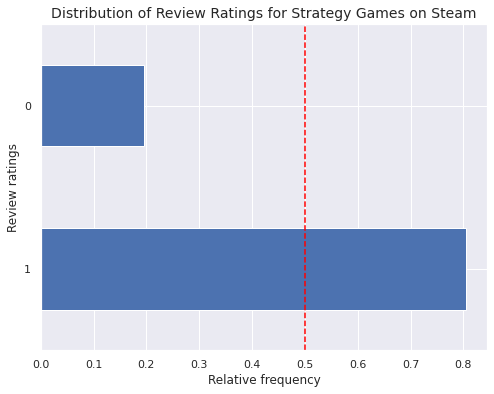

In [217]:
# Plotting the relative frequency distribution graph for the review ratings

## Creating a figure with a specific size
plt.figure(figsize=(8, 6))

## Calculating the relative frequency (i.e., normalizing) for each class of review ratings in the 'recommended' column
## Specifying that the chart will be a horizontal bar chart (i.e., the "barh" kind)
df['recommended'].value_counts(normalize=True).plot(kind='barh')

## Adding a dashed line along 50% relative frequency to denote the perfect balance line
plt.axvline(0.50, color="red", linestyle="--")

## Adding an appropriate X-axis label
plt.xlabel("Relative frequency", fontsize=12)

## Adding an appropriate Y-axis label
plt.ylabel("Review ratings", fontsize=12)

## Adding a title to the plot
plt.title("Distribution of Review Ratings for Strategy Games on Steam", fontsize=14);

As we can see, we have severe class imbalance issue, with positive reviews constituting more than 80% of the dataset while negative reviews only less than 20%.

### Addressing Class Imbalance Issue

Now we will address the class imbalance issue via data replication, primarily by upsampling and downsampling as needed.

In [218]:
# Calculating the updated negative reviews' count and % of total, after upsampling it to twice the original size

## Calculating the unchanged count of positive reviews
num_posrev1 = len(df[df['recommended']==1])

## Calculating the upsampled count of negative reviews
num_negrev1 = len(df[df['recommended']==0])
num_negrev2 = num_negrev1*2

## Printing the no. and % of total for upsampled negative reviews
print(f"Upsampling to reach twice their original size of {num_negrev1:,} will result in {num_negrev2:,} negative reviews.")

Upsampling to reach twice their original size of 172,648 will result in 345,296 negative reviews.


This will bridge the class imbalance to a great degree. To achieve proper split, we will also downsample the positive reviews (in random manner) so that it reaches the number of upsampled negative reviews.

In [219]:
# Calculating the % of downsampled positive reviews (equal to upsampled no. of negative reviews) to the pre-downsampled no. of positive reviews
pct_posrev2 = num_negrev2/num_posrev1

print(f"After downsampling to reach the no. of upsampled negative reviews, the downsampled number of positive reviews \
({num_negrev2:,}) will be {round(pct_posrev2*100,2)}% of the pre-downsampled number of positive reviews ({num_posrev1:,}).")

After downsampling to reach the no. of upsampled negative reviews, the downsampled number of positive reviews (345,296) will be 48.54% of the pre-downsampled number of positive reviews (711,388).


#### Upsampling Negative Reviews

As stated above, we will upsample the negative reviews to reach twice their original size.

In [220]:
# Creating a dataframe containing only the negative reviews (i.e., '0' value in the 'recommended' column)
df_neg = df[df['recommended'] == 0]

# Update this dataframe such that its original rows are created 2 times and then concatenated into one dataframe
## Ignoring the index values along the concatenation axis
df_neg = pd.concat([df_neg]*2, ignore_index=True)

In [221]:
print(f"Total number of negative reviews after upsampling: {df_neg.shape[0]:,}")

Total number of negative reviews after upsampling: 345,296


#### Downsampling Positive Reviews

As stated above, we will downsample the positive reviews randomly to reach 48.54% of their original size.

In [222]:
# Creating a dataframe containing only the positive reviews (i.e., '1' value in the 'recommended' column)
df_pos = df[df['recommended'] == 1]

# Updating this dataframe such that its original rows are downsampled (randomly) to 72.81% of the original set
## Calculating the fraction of target number of downsampled positive reviews (equal to number of upsampled negative reviews) to pre-downsampled number of positive reviews
df_pos_frac = len(df_neg) / len(df[df['recommended'] == 1])
## Assigning the above fraction to the pre-downsampled positive reviews to reach the target downsampled number of reviews
df_pos = df_pos.sample(frac=df_pos_frac, replace=True, random_state=1)

In [223]:
# Calculating and printing total no. of positive reviews after downsampling
print(f"Total number of positive reviews after downsampling: {df_pos.shape[0]:,}")

Total number of positive reviews after downsampling: 345,296


In [224]:
# Concatenating the upsampled-negative and downsampled-positive reviews dataframes to form the main dataset
df = pd.concat([df_pos, df_neg], axis=0)

# Shuffling the rows as the dataframe currently has positive reviews for its top-half and negative reviews for its bottom-half
# Resetting the row index so that positive and negative reviews can no longer be identified with their previous row index
df = df.sample(frac=1).reset_index(drop=True)

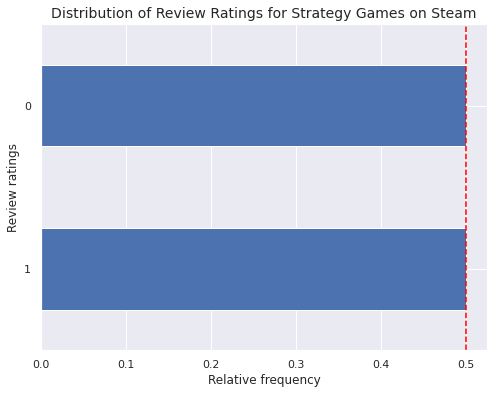

In [225]:
# Plotting the relative frequency distribution graph for the review ratings

## Creating a figure with a specific size
plt.figure(figsize=(8, 6))

## Calculating the relative frequency (i.e., normalizing) for each class of review ratings in the 'recommended' column
## Specifying that the chart will be a horizontal bar chart (i.e., the "barh" kind)
df['recommended'].value_counts(normalize=True).plot(kind='barh')

## Adding a dashed line along 50% relative frequency to denote the perfect balance line
plt.axvline(0.50, color="red", linestyle="--")

## Adding an appropriate X-axis label
plt.xlabel("Relative frequency", fontsize=12)

## Adding an appropriate Y-axis label
plt.ylabel("Review ratings", fontsize=12)

## Adding a title to the plot
plt.title("Distribution of Review Ratings for Strategy Games on Steam", fontsize=14);

Thus we have reached a 50/50 balance in the two classes. With this, we have concluded our data wrangling and clean-up for now, and can proceed with further exploration of the cleaned-up dataset.

# Exporting Review Text Data for Word2Vec Modelling in Part 5 of the Project 

We will now export the relevent columns (especially `review_text`) to train a Word2Vec model for Part 5 of this project. We do it at this point as this column is in the best shape now to serve that purpose and will undergo significant changes next.

In [227]:
# Creating a dataframe for Word2Vec modelling
df_w2v = df[['title', 'review_text', 'recommended']]

In [229]:
# Exporting the cleaned-up dataframe to pkl file
df_w2v.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/steam_review_strategy_cleaned.pkl", protocol=4)

---
# Exploratory Data Analysis #2 of 2

We will perform some additional EDA with the updated dataset.

In [77]:
# Displaying the total number of rows and columns in the Dataset (with thousand separators)
print(f"Total number of rows in the strategy game review data after data wrangling: {len(df):,}")
print(f"Total number of columns in the strategy game review data after data wrangling: {len(df.columns):,}")

Total number of rows in the strategy game review data after data wrangling: 690,592
Total number of columns in the strategy game review data after data wrangling: 7


## Most Reviewed Games in the Dataset

First, we look at which games have been reviewed the most.

In [78]:
# Creating a dataframe with counts of game in the dataset
num_game_reviews = df['title'].value_counts().rename_axis('Strategy Game Title').reset_index(name='Count of Reviews')

# Printing the dataframe created above
print(f"Count of reviews for each of the {len(num_game_reviews):,} strategy games in the dataset:")
num_game_reviews

Count of reviews for each of the 2,090 strategy games in the dataset:


,Strategy Game Title,Count of Reviews
0,Dota 2,35768
1,Arma 3,19576
2,Insurgency,14973
3,Total War(tm): ROME II - Emperor Edition,14057
4,Sid Meiers Civilization(r): Beyond Earth(tm),11327
...,...,...
2085,Golden Krone Hotel,1
2086,Diamond Joyce and the Secrets of Crystal Cave,1
2087,Raging Titan,1
2088,Rise of Keepers,1


Now let us see which games had the most reviews. We will look at the top 20 most-reviewed strategy games in the dataset:

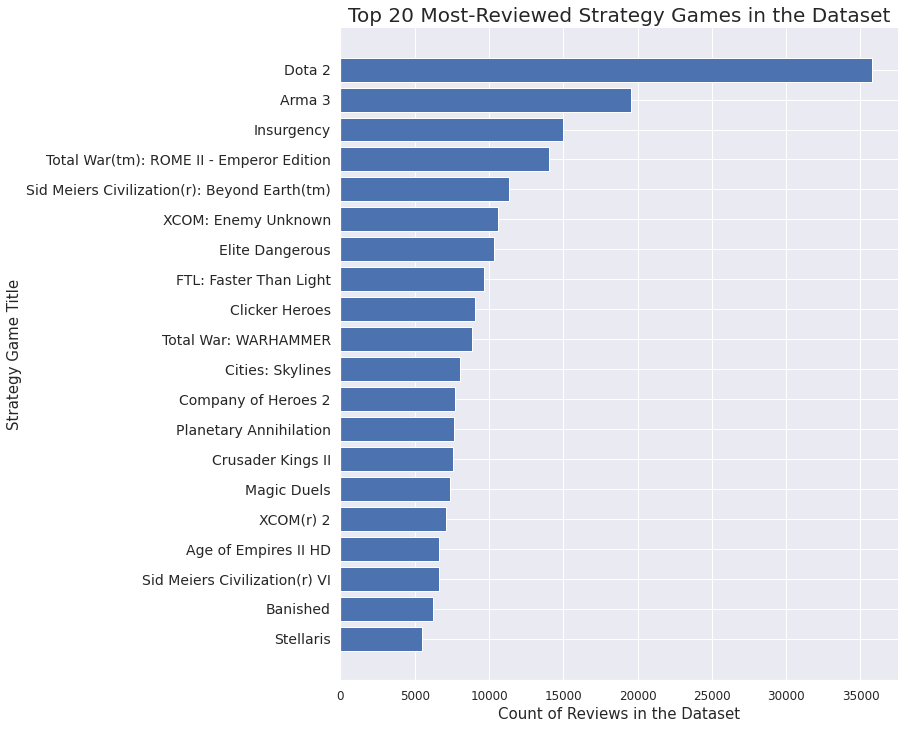

In [79]:
# Creating a dataframe with the top 20 most-reviewed strategy games
num_game_reviews_top20 = num_game_reviews.head(20).sort_values('Count of Reviews')


# Plotting the top 20 strategy games with the most reviews, in a bar chart

## Instantiating a figure for this purpose and specifying figure size
plt.figure(figsize=(10, 12))

## Specifying the data to plot in X and Y axes on an horizontal bar chart ("barh")
plt.barh(num_game_reviews_top20['Strategy Game Title'], num_game_reviews_top20['Count of Reviews'])

## Setting X and Y axes' labels and their fontsizes
plt.xlabel("Count of Reviews in the Dataset", fontsize=15)
plt.ylabel("Strategy Game Title", fontsize=15)

## Setting X and Y axes' ticks' fontsizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

## Setting plot title and its fontsize
plt.title("Top 20 Most-Reviewed Strategy Games in the Dataset", fontsize=20)

## Removing the right and top lines from the plot
sns.despine()

## Displaying the plot
plt.show;

Just a note of caution that the upsampling at random and downsampling have changed the actual numbers of occurrences for the games being reviewed, so we are presenting the above finding under this limitation specific to this particular dataset.

## Length of Review Text: Positive vs. Negative Reviews

Next, we will look at how long or short the reviews are, and how they are distributed between positive and negative reviews.

In [82]:
# First, we need refresh (re-calculate) these columns as the reviews have undergone substantial wrangling and clean-up
df['nontextchar_len'] = df.apply(lambda p: sum( not (q.isalnum()) for q in p['review_text'] ) , axis=1)\
                        - df['review_text'].apply(lambda x: x.count(" "))
df['nontextchar_pct'] = df['nontextchar_len'] / df['char_len']

In [83]:
df.head(5)

,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
0,17480,Command & Conquer: Red Alert 3,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got free ask origin make game better rofl would ea give damn ra3 ask done ra2,0,552,0,0.0
1,271900,Hexcells Plus,second part hexcel seri expand improv rather lacklust first part new mechan introduc general level much challeng demand season player logic puzzel game took around 10 hour complet brought much enjoy way easi first part seri sad still littl replay fix third instal real gripe far often game deriv difficulti bigger quantiti rather better qualiti later level huge challeng becom less figur logic puzzl spot one tile bottleneck let us continu still level typic area interest make feel realli satisfi figur absolut high point game three small level provid tough nut crack littl distract design ui first instal soundscap creat still interest mute game hour start becom grind larger level save function would nice never encount bug error crash like challeng logic puzzl might worth full price wholeheart recommend pick part trilog compil discount price,1,1211,0,0.0
2,321960,Might & Magic(r) Heroes(r) VII,game great overal think good job unit look balanc problem game easili corrupt file get corrupt cannot load moap previous file map fix onlin sourc say happen last 6 month beta iwth resolut,0,283,0,0.0
3,277950,Deadbreed(r),mani p2w dlc game good p2w dissapoint game,0,69,0,0.0
4,364360,Total War: WARHAMMER,like big fan tw seri last game let unfinish unbalanc broken reluct perhap naiv gave last tw instal chanc came reliev tell good good favorit tw far thing love far 1 balanc number one balanc right money real chees strat ok mayb ai build divers armi play card right win beauti done 2 divers ever race feel uniqu top ton new thing discov mage sergeant wizard witch hunter name 3 differ campaign run far felt distinct 3 real time battl look soldier fight ultra set look spectacular 4 campaign lord almighti tire play europ everi tw game whole campaign put togeth well lot uniqu terrain land marker thing need improv 1 chao thing feel unfinish perhap unbalanc still fun play broken long shot thing realli need fix like lot perk improv hord build incom 1 build generat incom rest upkeep reduct feel like everi build generat incom first start build game thought player would need drive conquer continu instead stay camp mode cf attila remov except one hey put mechan work second fulli upgrad gore beast chariot upkeep 7 gold whaaat yeah chees strat start kholek suneat want recruit archeon everchosen need 10 sacrific 160 turn 25 sacrific later still could unlock real shame oh give hellcannon dmg vs build truli worthless sieg equip great game ton fun far sure ton tw back,1,1837,0,0.0


### Descriptive Statistics

Let us look at some descriptive statistics of these columns.

In [84]:
# Getting the descriptive statistics (range, mean etc. for positive & negative reviews' length of review text) in a dataframe format
print("Descriptive statistics for the positive reviews' character length:")
df[df['recommended']==1]['char_len'].describe().to_frame()

Descriptive statistics for the positive reviews' character length:


,char_len
count,345296.000000
mean,297.502667
std,528.834157
min,1.000000
25%,50.000000
50%,120.000000
75%,313.000000
max,8000.000000


In [85]:
# Getting the descriptive statistics (range, mean etc. for positive & negative reviews' length of review text) in a dataframe format
print("Descriptive statistics for the negative reviews' character length:")
df[df['recommended']==0]['char_len'].describe().to_frame()

Descriptive statistics for the negative reviews' character length:


,char_len
count,345296.000000
mean,421.145191
std,665.409914
min,1.000000
25%,74.000000
50%,192.000000
75%,478.000000
max,7986.000000


### Distributions

Now let us look at their distributions.

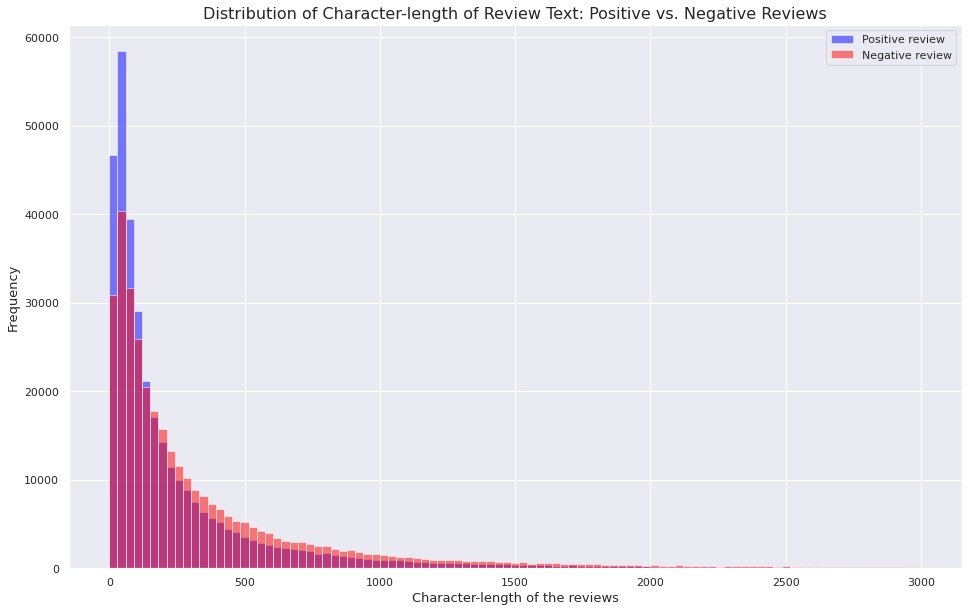

In [86]:
# Setting bin size and total range
## Though the upper bound of the range is 8000, very, very few data points exist beyond the first few thousands
## Choosing 3000 as otherwise the plot will mostly constitute the small frequencies and the more important large frequencies will get relatively illegible
bins = np.linspace(0, 3000, 100)

plt.figure(figsize=(16, 10))
plt.hist(df[df['recommended']==1]['char_len'], bins, color = 'blue', alpha=0.5, label='Positive review')
plt.hist(df[df['recommended']==0]['char_len'], bins, color = 'red', alpha=0.5, label='Negative review')
plt.legend(loc='upper right')
plt.xlabel("Character-length of the reviews", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.title("Distribution of Character-length of Review Text: Positive vs. Negative Reviews", fontsize = 16)
plt.show()

We can see right-skewed distribution (long tail to the right) for both. To make sure our models do not get biased by this skewness, we need to perform transformation, which is done in the [relevant section](#Applying-Box-Cox-Power-Transformation) below.

## Non-text Characters in Review Text: Positive vs. Negative Reviews

Next, we will look at the composition of the reviews from non-text character perspective.

### Descriptive Statistics - Length of Non-text Characters

In [87]:
# Getting the descriptive statistics (range, mean etc. for positive reviews' length of non-text characters) in a dataframe format
print("Descriptive statistics for the positive reviews' non-text character length:")
df[df['recommended']==1]['nontextchar_len'].describe().to_frame()

Descriptive statistics for the positive reviews' non-text character length:


,nontextchar_len
count,345296.000000
mean,0.508109
std,13.314007
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2460.000000


So the mean is extremely low, at about 0.5.

In [88]:
# Getting the descriptive statistics (range, mean etc. for negative reviews' length of non-text characters) in a dataframe format
print("Descriptive statistics for the negative reviews' non-text character length:")
df[df['recommended']==0]['nontextchar_len'].describe().to_frame()

Descriptive statistics for the negative reviews' non-text character length:


,nontextchar_len
count,345296.000000
mean,1.172884
std,16.756184
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3174.000000


So the mean is still low, only slightly over 1.

### Distributions - Proportion / Length of Non-text Characters

Now, looking at their distributions:

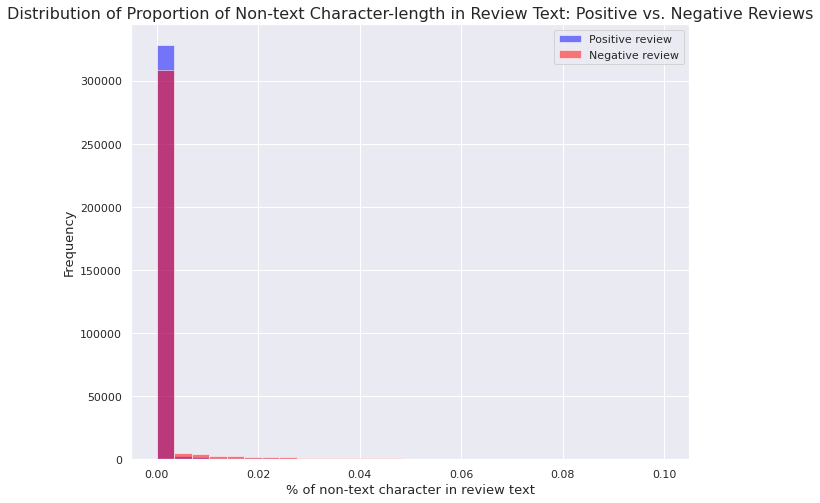

In [89]:
# Plotting distribution of proportion of non-text character-length in review text
bins = np.linspace(0, 0.1, 30)

sns.set(rc={'figure.figsize':(10, 8)})
plt.hist(df[df['recommended']==1]['nontextchar_pct'], bins, color = 'blue', alpha=0.5, label='Positive review')
plt.hist(df[df['recommended']==0]['nontextchar_pct'], bins, color = 'red', alpha=0.5, label='Negative review')
plt.legend(loc='upper right')
plt.xlabel("% of non-text character in review text", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.title("Distribution of Proportion of Non-text Character-length in Review Text: Positive vs. Negative Reviews", fontsize = 16)
plt.show()

This is not giving us any apparent, meaningful insights, so we will proceed with length of non-text characters.

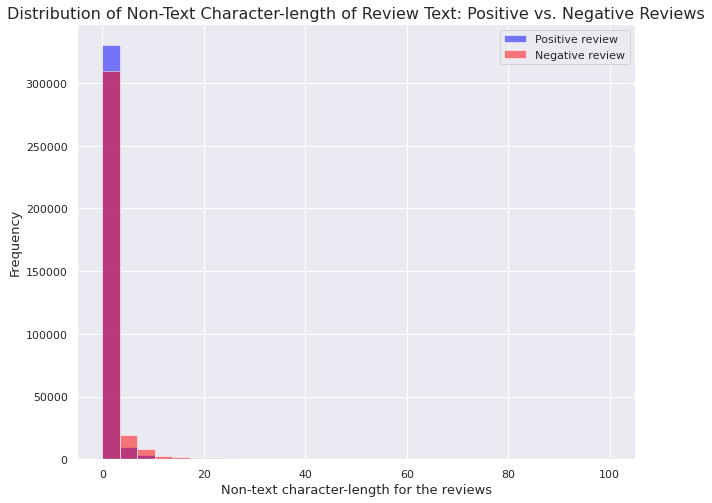

In [90]:
# Plotting distribution of non-text character-length in review text
bins = np.linspace(0, 100, 30)

sns.set(rc={'figure.figsize':(10, 8)})
plt.hist(df[df['recommended']==1]['nontextchar_len'], bins, color = 'blue', alpha=0.5, label='Positive review')
plt.hist(df[df['recommended']==0]['nontextchar_len'], bins, color = 'red', alpha=0.5, label='Negative review')
plt.legend(loc='upper right')
plt.xlabel("Non-text character-length for the reviews", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.title("Distribution of Non-Text Character-length of Review Text: Positive vs. Negative Reviews", fontsize = 16)
plt.show()

This is not giving us any distinct, meaningful insights either, that would help us distinguish between the positive and negative reviews. This was somewhat expected as we got cleaned up the dataset for non-text characters (e.g., punctuations). We will drop this column as well so as to not take the model's attention away from the meaningful signals in the dataset.

## Most Frequent Reviews / Words in Review Text

We will now tokenize (split the text into "tokens", which basically refers to smaller units of the text, e.g., words or sentences) and analyze the frequency of reviews or tokens in review text.

### Most Frequent Positive Reviews *(Document Form)*

Looking at whole blocks of text that are repeating in the reviews:

In [91]:
# First, we assign the positive reviews to a dataframe
pos_rev = df[df['recommended']==1]

# Returning a dataframe with counts of unique reviews in the positive review dataframe
print("Top 30 most-frequent unique reviews and their counts in the positive reviews:")
pos_rev['review_text'].value_counts().rename_axis('review_text').reset_index(name='review_count').head(30)

Top 30 most-frequent unique reviews and their counts in the positive reviews:


,review_text,review_count
0,great game,887
1,love game,522
2,nice game,372
3,good game,321
4,earli access review,282
5,good,257
6,love,249
7,addict,236
8,game awesom,202
9,cool,195


We can see very generic expressions of how the gamers felt (e.g., "great game", "cool game", "pretty good", etc.) and not much of what features or characteristics motivated them to recommend these games (e.g., "addictive"). So we need to perform some deeper analyses.

### Most Frequent Tokens in the Positive Reviews *(Word Form)*

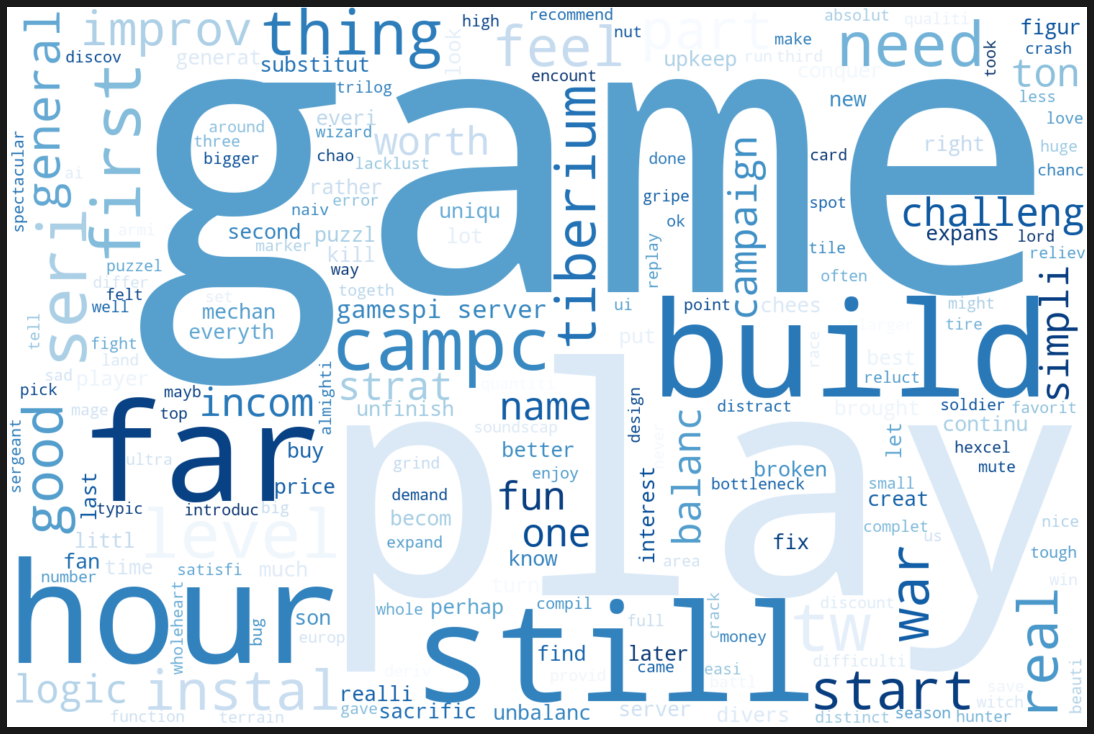

In [92]:
# Importing wordcloud library
from wordcloud import WordCloud,STOPWORDS
# If wordcloud is not installed, we can do so by executing in the command prompt
# e.g., "conda install -c conda-forge wordcloud=1.6.0"

# Importing Image module
from PIL import Image

# Importing path module
import os
from os import path

# Get data directory (using getcwd() is needed to support running example in generated IPython notebook)
datadir = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = pos_rev['review_text']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Blues',
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Again, we can see very generic words here.

### Most Frequent Negative Reviews *(Document Form)*

In [93]:
# First, we assign the negative reviews to a dataframe
neg_rev = df[df['recommended']==0]

# Returning a dataframe with counts of unique reviews in the positive review dataframe
print("Top 30 most-frequent unique reviews and their counts in the negative reviews:")
neg_rev['review_text'].value_counts().rename_axis('review_text').reset_index(name='review_count').head(30)

Top 30 most-frequent unique reviews and their counts in the negative reviews:


,review_text,review_count
0,earli access review,960
1,bore,404
2,suck,240
3,game suck,210
4,wast money,136
5,buy,108
6,bad,96
7,horribl,96
8,wast time,92
9,♥♥♥♥ game,82


We can see mostly how the gamers felt (e.g., "bored/boring", "horrible", "waste of time", etc.) and not much of what caused them to be dissatisfied with these games (e.g., "pay to win" system). So we need to perform some deeper analyses.

### Most Frequent Tokens in the Negative Reviews *(Word Form)*

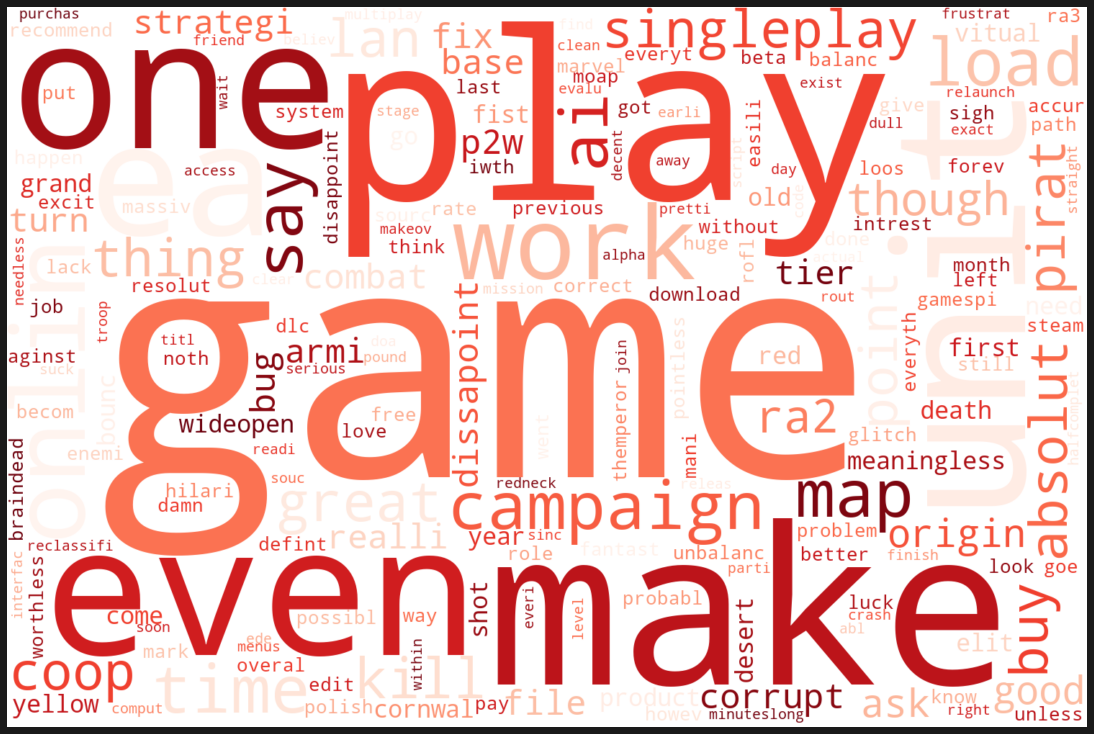

In [94]:
# The wordcloud library has already been imported above

# Importing Image module
from PIL import Image

# Importing path module
import os
from os import path

# Get data directory (using getcwd() is needed to support running example in generated IPython notebook)
datadir = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = neg_rev['review_text']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    colormap='Reds',
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Again, we can see very generic words here.

# Subsampling

## Definition

As [William J. Schroeder and Kenneth M. Martin defined subsampling in their *Visualization Handbook (2005)*](https://www.sciencedirect.com/topics/engineering/subsamplings), subsampling is a method that reduces data size by selecting a subset of the original data. In structured datasets, this can be done by selecting datapoints at a certain interval (i.e., every nth point) to form the subsample.

## Rationale for Subsampling this Dataset

With the dataset we have been working with thus far, some later (and crucial) operations resulted in memory errors in the local machine (which is reasonably powerful) as well as in high-end systems (Google Colab Pro+ with 52 gigabytes of RAM), not executing these critical commands at all. In order to address this issue, we are selecting a subsample of the dataset so that we can run our analyses and derive the necessary insights. This is a standard practice in such situations as long as we can ensure that the subsample is reasonably representative of its source dataset.

## Subsampling the Dataset

In [95]:
# Printing current number of rows in the dataset prior to subsampling
print(f"Number of rows in the dataset (before subsampling): {len(df):,}")

Number of rows in the dataset (before subsampling): 690,592


Now we will take every 10th datapoint in the dataset (taking each datapoint, skip the next 9 datapoints, and take the next one, and so on), and use them to form our subsample.

In [96]:
# Creating the subsample by taking the rows with an index-interval of 10, and resetting index so that the subsample doesn't retain the original index
sample = df.iloc[::10, :].reset_index(drop=True)

In [97]:
print(f"Top 5 rows of the total {len(sample):,} rows in the subsample:")
sample.head(5)

Top 5 rows of the total 69,060 rows in the subsample:


,steam_id,title,review_text,recommended,char_len,nontextchar_len,nontextchar_pct
0,17480,Command & Conquer: Red Alert 3,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got free ask origin make game better rofl would ea give damn ra3 ask done ra2,0,552,0,0.0
1,115120,Iron Brigade,differ type base defenc game,1,31,0,0.0
2,65980,Sid Meiers Civilization(r): Beyond Earth(tm),play civ 5 fell love year later mani lost hour still howev game beyond earth great idea mani miss peic made civ 5 monument faction pretti much feel ai lame person attitud idea bring new world alien great get annoy quick blaze littl bugger diplomaci like deal dmv might well punch face great idea mayb futur get better right want tri civ game turn right around saddl civ 5,0,505,0,0.0
3,239820,Game Dev Tycoon,realli fun,1,10,0,0.0
4,48240,Anno 2070(tm),still best colonybuild game market 2 year releas easi learn tough master lot depth replay,1,122,0,0.0


## Subsample Representativeness

Now we will check if the subsample we constructed reasonably resemble the original dataset.

### Distribution of Games Being Reviewed in the Subsample vs. the Main Dataset

First, we check the general distribution of games (limited to top 20 to capture most of the value) that were reviewed in the main dataset vis à vis the subsample:

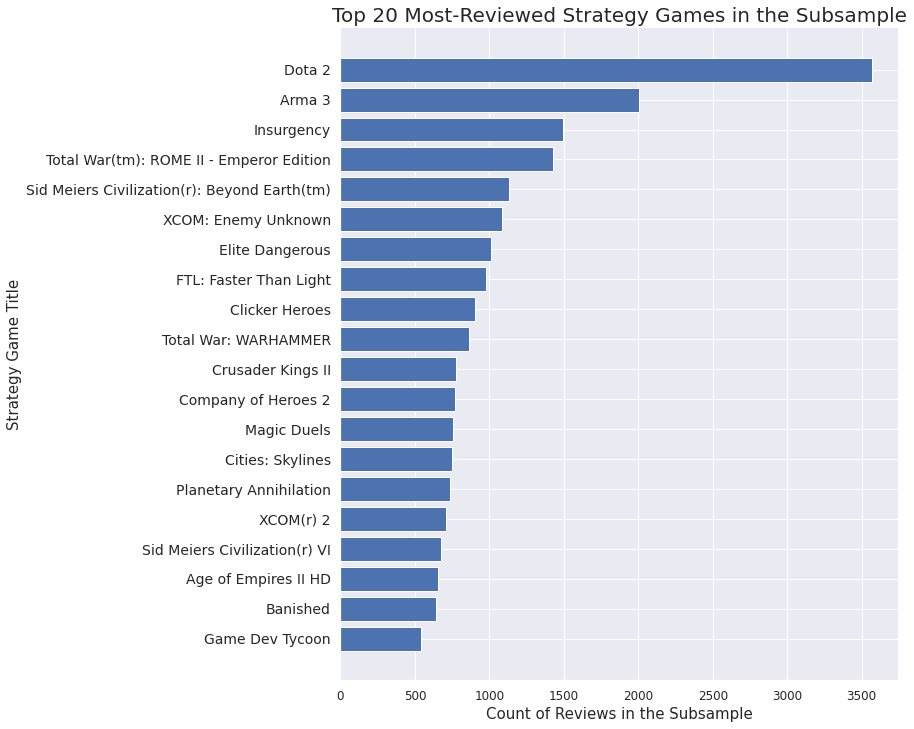

In [98]:
# Creating a dataframe with counts of game in the subsample
num_game_reviews_sample = sample['title'].value_counts().rename_axis('Strategy Game Title').reset_index(name='Count of Reviews')

# Creating a dataframe with the top 20 most-reviewed strategy games
num_game_reviews_top20_sample = num_game_reviews_sample.head(20).sort_values('Count of Reviews')


# Plotting the top 20 strategy games with the most reviews in the subsample, in a bar chart

## Instantiating a figure for this purpose and specifying figure size
plt.figure(figsize=(10, 12))

## Specifying the data to plot in X and Y axes on an horizontal bar chart ("barh")
plt.barh(num_game_reviews_top20_sample['Strategy Game Title'], num_game_reviews_top20_sample['Count of Reviews'])

## Setting X and Y axes' labels and their fontsizes
plt.xlabel("Count of Reviews in the Subsample", fontsize=15)
plt.ylabel("Strategy Game Title", fontsize=15)

## Setting X and Y axes' ticks' fontsizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

## Setting plot title and its fontsize
plt.title("Top 20 Most-Reviewed Strategy Games in the Subsample", fontsize=20)

## Removing the right and top lines from the plot
sns.despine()

## Displaying the plot
plt.show;

If we compare the above distribution against the same for the main dataset, we can see that they exactly match bar 3 games in the lower half moving a couple of spots. This is an excellent resemblance of the main dataset.

### Distribution of Character-length of Review Test in the Subsample vs. the Main Dataset

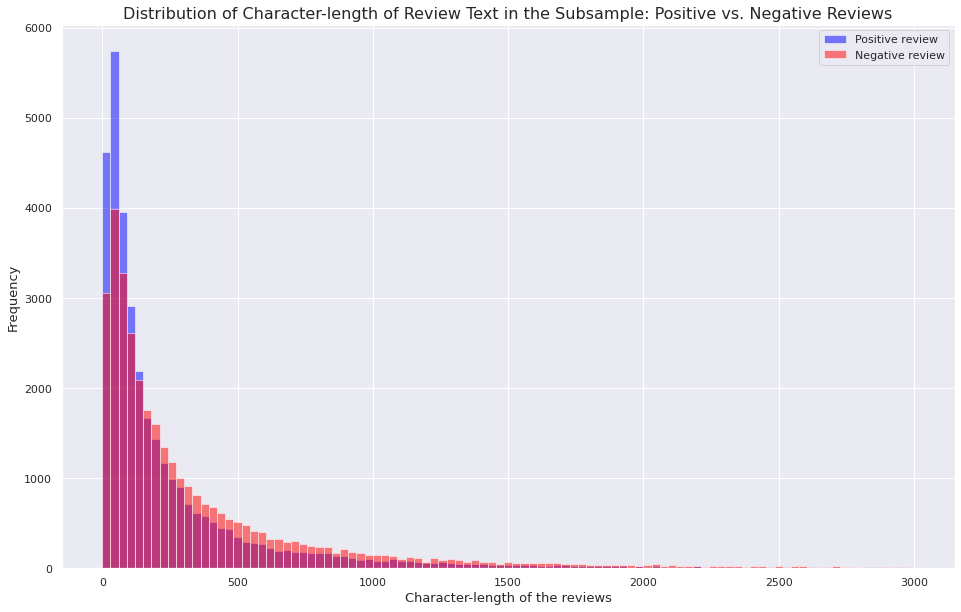

In [99]:
# Setting bin size and total range
## Though the upper bound of the range is 8000, very, very few data points exist beyond the first few thousands
## Choosing 3000 as otherwise the plot will mostly constitute the small frequencies and the more important large frequencies will get relatively illegible
bins = np.linspace(0, 3000, 100)

plt.figure(figsize=(16, 10))
plt.hist(sample[sample['recommended']==1]['char_len'], bins, color = 'blue', alpha=0.5, label='Positive review')
plt.hist(sample[sample['recommended']==0]['char_len'], bins, color = 'red', alpha=0.5, label='Negative review')
plt.legend(loc='upper right')
plt.xlabel("Character-length of the reviews", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.title("Distribution of Character-length of Review Text in the Subsample: Positive vs. Negative Reviews", fontsize = 16)
plt.show()

The distribution for the subsample above is an almost exact replica of the same for the original dataset.

We can therefore confidently conclude that our subsample is sufficiently representative of the original dataset and our intended analyses and modelling performed on the subsample should derive very similar insights that we would have got from the main dataset.

From this point and onwards, we will refer to the subsample as the "dataset" as we will be working with only the subsample and not the main dataset.

---
# Data Preprocessing for Modelling

Now we can proceed to preprocessing the dataset for modelling in the next part of this project. Our preprocessing will include:
- Feature engineering
- Feature selection
- Feature transformation
- Feature scaling
- Vectorizing and processing non-numeric data

## Feature Engineering

We will perform some feature engineering in order to improve the performance of the model.

### Length of Review Text

We created this feature as part of [the section above that addresses non-text elements in the review text](#Addressing-Non-text-Elements-in-Review-Text).

### Length / Proportion of Non-text Characters in Review Text

We created this feature as part of [the section above that addresses non-text elements in the review text](#Addressing-Non-text-Elements-in-Review-Text) as well.

## Feature Selection

Dropping the `nontextchar_pct` and `nontextchar_len` columns as we have seen [while exploring them](#Non-text-Characters-in-Review-Text:-Positive-vs.-Negative-Reviews) that they do not add any valuable insights to our analyses. The remaining columns that we have in the dataset at the moment are all important and thus will be retained.

In [100]:
# Dropping the 'nontextchar_pct' and 'nontextchar_len' columns
sample = sample.drop(['nontextchar_pct', 'nontextchar_len'], axis=1)

In [101]:
# Updated dataframe after dropping the aforementioned columns
print("Update dataframe after dropping the columns representing length and proportion of non-text characters:")
sample.head(3)

Update dataframe after dropping the columns representing length and proportion of non-text characters:


,steam_id,title,review_text,recommended,char_len
0,17480,Command & Conquer: Red Alert 3,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got free ask origin make game better rofl would ea give damn ra3 ask done ra2,0,552
1,115120,Iron Brigade,differ type base defenc game,1,31
2,65980,Sid Meiers Civilization(r): Beyond Earth(tm),play civ 5 fell love year later mani lost hour still howev game beyond earth great idea mani miss peic made civ 5 monument faction pretti much feel ai lame person attitud idea bring new world alien great get annoy quick blaze littl bugger diplomaci like deal dmv might well punch face great idea mayb futur get better right want tri civ game turn right around saddl civ 5,0,505


## Feature Transformation

As we have observed substantial skewness in the length of review text above, we need to transform this feature in order to relieve the model of bias arising from this skewness. we have chosen Box-Cox power transformation for this, as explained below.

### Power Transformation on Length of Review Text

#### Choosing the Power Transformation Approach

There are [two popular approaches for automatic power transformation](https://machinelearningmastery.com/power-transforms-with-scikit-learn/):
- Box-Cox transform
- Yeo-Johnson transform

Box-Cox transform is a power transform that assumes the values of the input variable to which it is applied are strictly positive (i.e., non-zero and non-negative). Our data in question - the length of review text - can neither be negative (text length cannot be negative) nor zero (text length can be zero, in case of a blank review to go with the rating, but blank reviews are useless for our purpose and have been removed from our working dataset therefore in two earlier sections that dealt with [removing missing values](#Checking-for-Missing-Values) and [other section that removes reviews containing only ""]). We can therefore apply the Box-Cox transform to this data.

#### Choosing the Power

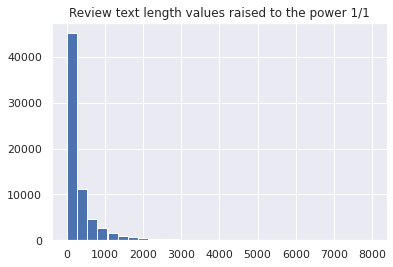

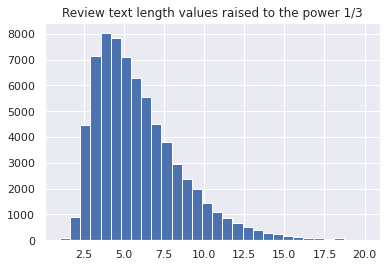

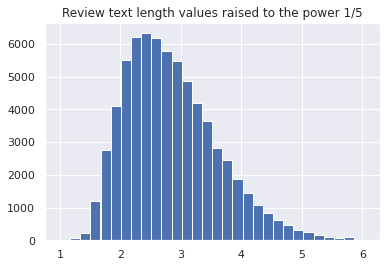

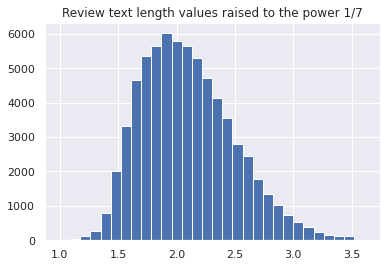

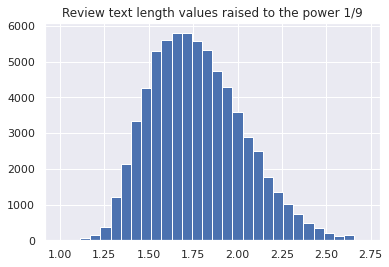

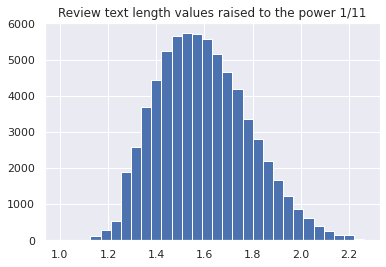

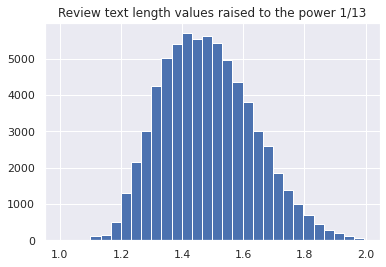

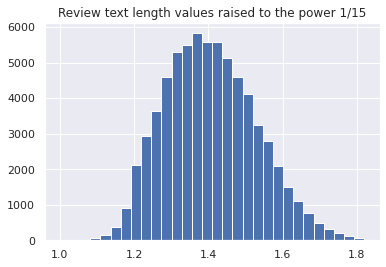

In [102]:
# Setting figure size to a smaller size than before as we will be iterating through a number of plots
sns.set(rc={'figure.figsize':(6, 4)})

# Looping through power transformations where the values of the variable will be raised to 1 over integers ranging from 1 to 15 (in increments of 2)
for n in range(1,16,2):
    plt.hist((sample['char_len'])**(1/n), bins = 30)
    plt.title("Review text length values raised to the power 1/{}".format(str(n)))
    plt.show()

As we can see from the above plots, the character-length data is converging to a normal distribution shape the more we are progressing through (i.e., the more we are increasing the denominator of the power the values are raised to), and around 1/13-1/15 is where we see the data resembling a true bell curve as in a normal distribution and negligible skewness. We do not see any outliers either.

#### Applying Box-Cox Power Transformation


In [103]:
# Importing the necessary package
from scipy import stats

# Applying Box-Cox power transformation on the 'char_len' column
x, y = stats.boxcox(sample['char_len'])
sample['char_len_transformed'] = x

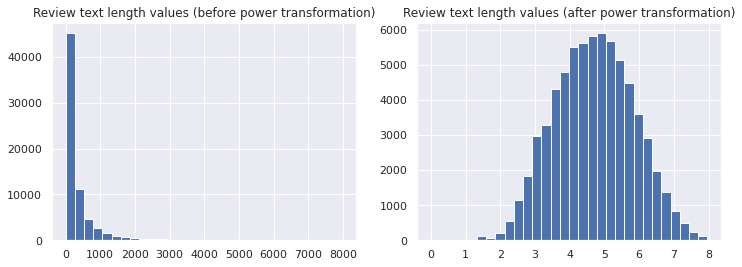

In [104]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.hist((sample['char_len']), bins = 30)
plt.title("Review text length values (before power transformation)")

plt.subplot(122)
plt.hist((sample['char_len_transformed']), bins = 30)
plt.title("Review text length values (after power transformation)")
plt.show()

Now we will drop the pre-transformation `char_len` column as we will be working with the post-transformation `char_len_transformed` column for our modelling, and keeping both will give rise to obvious multicollinearity as one of these column is simply a derivative of the other, nothing more.

In [105]:
# dataframe after dropping the 'char_len' column ("1" represents column here)
sample = sample.drop('char_len', 1)

# Updated dataframe after dropping the 'char_len' column
print("Updated dataset after dropping the 'char_len' column:")
sample.head(3)

Updated dataset after dropping the 'char_len' column:


,steam_id,title,review_text,recommended,char_len_transformed
0,17480,Command & Conquer: Red Alert 3,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got free ask origin make game better rofl would ea give damn ra3 ask done ra2,0,5.797987
1,115120,Iron Brigade,differ type base defenc game,1,3.277495
2,65980,Sid Meiers Civilization(r): Beyond Earth(tm),play civ 5 fell love year later mani lost hour still howev game beyond earth great idea mani miss peic made civ 5 monument faction pretti much feel ai lame person attitud idea bring new world alien great get annoy quick blaze littl bugger diplomaci like deal dmv might well punch face great idea mayb futur get better right want tri civ game turn right around saddl civ 5,0,5.723033


## Scaling the Data

When considering the current and future numeric columns (`recommended` and `char_len_transformed` being the current; the vectorized game titles and review text being the future as we will cover in the next section), we see that all the numeric columns will take a value between 0 and 1 except the `char_len_transformed` column as it stands now. We need to make sure that the model is taking in numeric data in a standardized form. So we will further transform the `char_len_transformed` column data in a way that it takes a value between 0 and 1 while retaining its distribution. This is what **data normalization** is - rescaling the data from its original range in a way that all the values are scaled within the range of 0 and 1, while preserving the shape of its original distribution. The scaling method to achieve data normalization is the MinMax Scaler (scaling the data between its original minimum and maximum bound).

In [106]:
# Importing the MinMax Scaler to normalize the 'char_len_transformed' column
from sklearn.preprocessing import minmax_scale

sample['char_len_transformed'] = minmax_scale(sample['char_len_transformed'])

In [107]:
# Updated dataframe after scaling the 'char_len_transformed' column
print("Updated dataset after scaling the 'char_len_transformed' column:")
sample.head(3)

Updated dataset after scaling the 'char_len_transformed' column:


,steam_id,title,review_text,recommended,char_len_transformed
0,17480,Command & Conquer: Red Alert 3,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got free ask origin make game better rofl would ea give damn ra3 ask done ra2,0,0.727943
1,115120,Iron Brigade,differ type base defenc game,1,0.411493
2,65980,Sid Meiers Civilization(r): Beyond Earth(tm),play civ 5 fell love year later mani lost hour still howev game beyond earth great idea mani miss peic made civ 5 monument faction pretti much feel ai lame person attitud idea bring new world alien great get annoy quick blaze littl bugger diplomaci like deal dmv might well punch face great idea mayb futur get better right want tri civ game turn right around saddl civ 5,0,0.718533


In [108]:
print(f"Range of values in the 'char_len_transformed' columns: {sample['char_len_transformed'].min()} - {sample['char_len_transformed'].max()}")

Range of values in the 'char_len_transformed' columns: 0.0 - 1.0


This concludes our feature transformation.

## Vectorizing & Processing Non-numeric Data

Now we will vectorize the non-numeric data in order to make them digestible for our models later on.

There are two non-numeric data columns: game titles (the `title` column) and the review text (the `review_text` column).

### Dummy-encoding Game Titles

We need to dummy-encode this column in order for our models to, e.g., identify which games are getting more of the positive or negative reviews.

- As we can see from below, a huge number of games are being reviewed in the Dataset (**1,731** strategy games), so we should not proceed directly to dummy-encoding this column before ensuring that there is a more efficient and practical way of going about it.
- Also, from the [top 20 games that gained the most numbers of reviews in the dataset](###Distribution-of-Games-Being-Reviewed-in-the-Subsample-vs.-the-Main-Dataset), a good number of the games have reviews in the thousands (the highest being Dota 2 with **significantly over 3,500** reviews in this particular dataset) while a lot of the games have very few reviews (a significant number of games with just one review for them).

The strategy games with only a few reviews will not be useful to be considered separately and dummy-encoded, so a reasonable approach will be to bunch them into 'Other' category. To this end, we will first undertake an experimental run of counting the number of strategy games with less than a few hundred reviews -

In [109]:
# Calculating as described above
for n in range(50,501,50):
    print(f"Number of strategy games (out of total {sample['title'].nunique():,}) with more than {n} reviews in the dataset:\
 {len(num_game_reviews_sample[num_game_reviews_sample['Count of Reviews'] > n])}")

Number of strategy games (out of total 1,759) with more than 50 reviews in the dataset: 250
Number of strategy games (out of total 1,759) with more than 100 reviews in the dataset: 135
Number of strategy games (out of total 1,759) with more than 150 reviews in the dataset: 94
Number of strategy games (out of total 1,759) with more than 200 reviews in the dataset: 68
Number of strategy games (out of total 1,759) with more than 250 reviews in the dataset: 51
Number of strategy games (out of total 1,759) with more than 300 reviews in the dataset: 39
Number of strategy games (out of total 1,759) with more than 350 reviews in the dataset: 33
Number of strategy games (out of total 1,759) with more than 400 reviews in the dataset: 29
Number of strategy games (out of total 1,759) with more than 450 reviews in the dataset: 25
Number of strategy games (out of total 1,759) with more than 500 reviews in the dataset: 24


As we can see from the above, if we put strategy games with fewer than 100 reviews into an 'Other' bucket, we will need to dummy-encode only about 150 game titles (including the "Other" label), which is a much manageable and reasonable level of game titles to dummy-encode (1,731 before vs. about 100 after). We may only need to look at the top 100 games that gamers tend to rate positively or negatively as they have more value-weights in terms of insights.

In [110]:
# Labelling games with fewer than 1500 reviews as 'Other' 
num_game_reviews_sample['Strategy Game Title'].loc[(num_game_reviews_sample['Count of Reviews'] < 100)] = 'Other'

# Displaying updated num_game_reviews dataframe
print("Strategy games and their review counts after labelling a portion as 'Other':")
num_game_reviews_sample

Strategy games and their review counts after labelling a portion as 'Other':


,Strategy Game Title,Count of Reviews
0,Dota 2,3569
1,Arma 3,2006
2,Insurgency,1492
3,Total War(tm): ROME II - Emperor Edition,1426
4,Sid Meiers Civilization(r): Beyond Earth(tm),1130
...,...,...
1754,Other,1
1755,Other,1
1756,Other,1
1757,Other,1


In [111]:
print(f"No. of total strategy game titles originally (before labelling a portion as 'Other'): {sample['title'].nunique():,}")
print(f"No. of updated unique strategy game titles (after including 'Other' label): {num_game_reviews_sample['Strategy Game Title'].nunique():,}")

No. of total strategy game titles originally (before labelling a portion as 'Other'): 1,759
No. of updated unique strategy game titles (after including 'Other' label): 136


This is a much manageable and reasonable level of game titles to dummy-encode (139 now vs. 1,731 before) considering we will still get a more-than-reasonable number of reviews (at least 100) for each of the strategy games that have not been labeled 'Other'.

Now we will make this conversion in the main dataset.

In [112]:
# Taking the unique game titles (after converting a portion to 'Other') and assigning to a list
game_titles = num_game_reviews_sample['Strategy Game Title'].unique().tolist()

# Passing main dataset's game titles into the unique game titles list created above
# For any title in the main dataset ('title' column) that is NOT (hence the use of "~") in the list above, will be assigned an 'Other' title
sample.loc[~sample['title'].isin(game_titles), 'title'] = "Other"

In [113]:
# Printing the game titles in the main dataset along with the count of reviews for each
print("Strategy game titles in the main dataset after converting a portion to 'Other' label:")
sample['title'].value_counts().rename_axis('Game Title in the Main Dataset').reset_index(name='Count of Reviews')

Strategy game titles in the main dataset after converting a portion to 'Other' label:


,Game Title in the Main Dataset,Count of Reviews
0,Other,23269
1,Dota 2,3569
2,Arma 3,2006
3,Insurgency,1492
4,Total War(tm): ROME II - Emperor Edition,1426
...,...,...
131,Cities in Motion 2,102
132,Craft The World,102
133,Tharsis,102
134,Rise of Nations: Extended Edition,102


Comparing the above table with the one above it, we can conclude that the game titles have been labeled (with 'Other') as intended, with no game title having fewer than 100 reviews that are not labeled as 'Other'.

Now we can proceed to dummy-encoding these game titles.

In [114]:
# Dummy-encoding the 'title' column (creating new columns for each of the hotel with prefix "title"
game_title_dummies = pd.get_dummies(sample.title, prefix='title')

# Column-binding the newly created 'game_title_dummies' dataframe to the main dataframe
sample = pd.concat([sample, game_title_dummies], axis=1)

In [115]:
# Displaying the updated dataset
print("Updated dataset after dummy-encoding the strategy game titles:")
sample.head(2)

Updated dataset after dummy-encoding the strategy game titles:


,steam_id,title,review_text,recommended,char_len_transformed,title_100% Orange Juice,title_Age of Empires II HD,title_Age of Mythology: Extended Edition,title_Age of Wonders III,title_Anno 2070(tm),title_Anno 2205(tm),title_Arma 2: Operation Arrowhead,title_Arma 3,title_Awesomenauts,title_Baldurs Gate: Enhanced Edition,title_Banished,title_Battlefleet Gothic: Armada,title_Blackguards,title_Block N Load,title_Blood Bowl 2,title_Bloons TD Battles,title_Braid,title_Brutal Legend,title_Card Hunter,title_Caster,title_Cities in Motion 2,title_Cities: Skylines,title_Clicker Heroes,title_Company of Heroes 2,title_Cook Serve Delicious!,title_Craft The World,title_Crusader Kings II,title_Darkest Dungeon,title_Democracy 3,title_Divinity: Original Sin (Classic),title_Divinity: Original Sin - Enhanced Edition,title_Dota 2,title_Dungeon Defenders,title_Dungeon Defenders Eternity,title_Dungeon of the Endless(tm),title_Elite Dangerous,title_Empire: Total War(tm),title_Endless Legend(tm),title_Endless Space(r) - Emperor Edition,title_FTL: Faster Than Light,title_Five Nights at Freddys 4,title_Fractured Space,title_Freestyle2: Street Basketball,title_GASP,title_Galactic Civilizations III,title_Game Dev Tycoon,title_Grey Goo,title_Gunpoint,title_Hearts of Iron III,title_Hearts of Iron IV,title_Heroes(r) of Might & Magic(r) III - HD Edition,title_Homeworld Remastered Collection,title_Homeworld: Deserts of Kharak,title_HuniePop,title_Hydrophobia: Prophecy,title_Hyperdimension Neptunia Re;Birth1 / Chao Ci Ci Yuan geimu neputeyunuRe;Birth1,title_Insurgency,title_Kingdom Wars,title_L.A. Noire,title_Long Live The Queen,title_Magic 2014 -- Duels of the Planeswalkers,title_Magic 2015 - Duels of the Planeswalkers,title_Magic Duels,title_MechWarrior Online(tm),title_Men of War: Assault Squad 2,title_Might & Magic(r) Heroes(r) VII,title_Might & Magic: Heroes VI,title_Monaco: Whats Yours Is Mine,title_Moonbase Alpha,title_Mordheim: City of the Damned,title_Napoleon: Total War(tm),title_Orcs Must Die!,title_Orcs Must Die! Unchained - Open Beta,title_Other,title_Out There Somewhere,title_Party Hard,title_Plague Inc: Evolved,title_Planet Coaster,title_Planetary Annihilation,title_Planetary Annihilation: TITANS,title_Planetbase,title_Plants vs. Zombies GOTY Edition,title_Polarity,title_Primal Carnage,title_Prison Architect,title_Punch Club,title_Reus,title_Rise of Nations: Extended Edition,title_Rome: Total War(tm) - Collection,title_STAR WARS(tm) Empire at War - Gold Pack,title_Sanctum 2,title_Scribblenauts Unlimited,title_Shadowrun Returns,title_Shadowrun: Dragonfall - Directors Cut,title_Sid Meiers Civilization(r) V,title_Sid Meiers Civilization(r) VI,title_Sid Meiers Civilization(r): Beyond Earth(tm),title_Sid Meiers Starships,title_SimCity(tm) 4 Deluxe Edition,title_Sins of a Solar Empire(r): Rebellion,title_Spacebase DF-9,title_StarDrive,title_StarDrive 2,title_Stellaris,title_Stronghold Crusader 2,title_Stronghold Kingdoms,title_Super MNC,title_Supreme Commander 2,title_Tabletop Simulator,title_Takedown: Red Sabre,title_Talisman: Digital Edition,title_Tharsis,title_The Banner Saga,title_The Escapists,title_Toribash,title_Total War Battles: KINGDOM,title_Total War(tm): ROME II - Emperor Edition,title_Total War: ATTILA,title_Total War: SHOGUN 2,title_Total War: WARHAMMER,title_Town of Salem,title_Towns,title_Tropico 4: Steam Special Edition,title_Tropico 5,title_Valkyria Chronicles(tm),title_Verdun,title_WAKFU,title_War for the Overworld,title_Wargame: Airland Battle,title_Wargame: Red Dragon,title_Warhammer 40000: Dawn of War II: Retribution,title_Warhammer(r) 40000(tm): Dawn of War(r) II,title_Wasteland 2: Directors Cut,title_XCOM(r) 2,title_XCOM: Enemy Unknown,title_Yet Another Zombie Defense
0,17480,Other,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari th

We can see from the above two example rows that the game titles in the `title` column correspond to the respective `title_(game title)` column where the latter has a '1' value with the remaining dummy columns with '0' values.

We also check that the number of newly-added dummy variable columns add up.

In [116]:
# Printing the number of columns in the updated dataset
print(f"No. of columns in the updated dataset: {sample.columns.nunique()}")

No. of columns in the updated dataset: 141


Thus we ensure that the game titles have been successfully dummy-encoded and added to the main dataset.

Now we will drop the `title` column as its purpose is served and the models cannot digest such non-numeric columns. We will also drop the `steam_id` column as it is directly related to the corresponding game title dummy variable column.

In [117]:
# Dropping the 'steam_id' and 'title' columns
sample = sample.drop(['steam_id', 'title'], axis=1)

In [118]:
# Displaying the updated dataset
print("Updated dataset after dropping the 'steam_id' and 'title' columns:")
sample.head(2)

Updated dataset after dropping the 'steam_id' and 'title' columns:


,review_text,recommended,char_len_transformed,title_100% Orange Juice,title_Age of Empires II HD,title_Age of Mythology: Extended Edition,title_Age of Wonders III,title_Anno 2070(tm),title_Anno 2205(tm),title_Arma 2: Operation Arrowhead,title_Arma 3,title_Awesomenauts,title_Baldurs Gate: Enhanced Edition,title_Banished,title_Battlefleet Gothic: Armada,title_Blackguards,title_Block N Load,title_Blood Bowl 2,title_Bloons TD Battles,title_Braid,title_Brutal Legend,title_Card Hunter,title_Caster,title_Cities in Motion 2,title_Cities: Skylines,title_Clicker Heroes,title_Company of Heroes 2,title_Cook Serve Delicious!,title_Craft The World,title_Crusader Kings II,title_Darkest Dungeon,title_Democracy 3,title_Divinity: Original Sin (Classic),title_Divinity: Original Sin - Enhanced Edition,title_Dota 2,title_Dungeon Defenders,title_Dungeon Defenders Eternity,title_Dungeon of the Endless(tm),title_Elite Dangerous,title_Empire: Total War(tm),title_Endless Legend(tm),title_Endless Space(r) - Emperor Edition,title_FTL: Faster Than Light,title_Five Nights at Freddys 4,title_Fractured Space,title_Freestyle2: Street Basketball,title_GASP,title_Galactic Civilizations III,title_Game Dev Tycoon,title_Grey Goo,title_Gunpoint,title_Hearts of Iron III,title_Hearts of Iron IV,title_Heroes(r) of Might & Magic(r) III - HD Edition,title_Homeworld Remastered Collection,title_Homeworld: Deserts of Kharak,title_HuniePop,title_Hydrophobia: Prophecy,title_Hyperdimension Neptunia Re;Birth1 / Chao Ci Ci Yuan geimu neputeyunuRe;Birth1,title_Insurgency,title_Kingdom Wars,title_L.A. Noire,title_Long Live The Queen,title_Magic 2014 -- Duels of the Planeswalkers,title_Magic 2015 - Duels of the Planeswalkers,title_Magic Duels,title_MechWarrior Online(tm),title_Men of War: Assault Squad 2,title_Might & Magic(r) Heroes(r) VII,title_Might & Magic: Heroes VI,title_Monaco: Whats Yours Is Mine,title_Moonbase Alpha,title_Mordheim: City of the Damned,title_Napoleon: Total War(tm),title_Orcs Must Die!,title_Orcs Must Die! Unchained - Open Beta,title_Other,title_Out There Somewhere,title_Party Hard,title_Plague Inc: Evolved,title_Planet Coaster,title_Planetary Annihilation,title_Planetary Annihilation: TITANS,title_Planetbase,title_Plants vs. Zombies GOTY Edition,title_Polarity,title_Primal Carnage,title_Prison Architect,title_Punch Club,title_Reus,title_Rise of Nations: Extended Edition,title_Rome: Total War(tm) - Collection,title_STAR WARS(tm) Empire at War - Gold Pack,title_Sanctum 2,title_Scribblenauts Unlimited,title_Shadowrun Returns,title_Shadowrun: Dragonfall - Directors Cut,title_Sid Meiers Civilization(r) V,title_Sid Meiers Civilization(r) VI,title_Sid Meiers Civilization(r): Beyond Earth(tm),title_Sid Meiers Starships,title_SimCity(tm) 4 Deluxe Edition,title_Sins of a Solar Empire(r): Rebellion,title_Spacebase DF-9,title_StarDrive,title_StarDrive 2,title_Stellaris,title_Stronghold Crusader 2,title_Stronghold Kingdoms,title_Super MNC,title_Supreme Commander 2,title_Tabletop Simulator,title_Takedown: Red Sabre,title_Talisman: Digital Edition,title_Tharsis,title_The Banner Saga,title_The Escapists,title_Toribash,title_Total War Battles: KINGDOM,title_Total War(tm): ROME II - Emperor Edition,title_Total War: ATTILA,title_Total War: SHOGUN 2,title_Total War: WARHAMMER,title_Town of Salem,title_Towns,title_Tropico 4: Steam Special Edition,title_Tropico 5,title_Valkyria Chronicles(tm),title_Verdun,title_WAKFU,title_War for the Overworld,title_Wargame: Airland Battle,title_Wargame: Red Dragon,title_Warhammer 40000: Dawn of War II: Retribution,title_Warhammer(r) 40000(tm): Dawn of War(r) II,title_Wasteland 2: Directors Cut,title_XCOM(r) 2,title_XCOM: Enemy Unknown,title_Yet Another Zombie Defense
0,great fantast marvel game kill ea gamespi went steam accur singleplay mark lan work onlin coop forev sigh recommend absolut point buy pay ea absolut noth without onlin coop worthless thing download pirat game lan campaign work pirat one know hilari though play ra2 origin got fr

### Splitting into Train & Test Sets

We will need to dummy-encode the most crucial column in the dataset - `review_text` - but we will do so after the train/test split. The rationale of this order of operation being:


- If we do the train/test split *after* vectorizing the text, our document-term matrix will include all the vocabulary across all the documents in the corpus. Every word will be assigned a feature (column). However, in a real-life scenario, we are not expected to know all the words (as they relate to, e.g., the particular industry in question, which here is the strategy games sector). Instead, in reality, we try to make prediction for unseen words and evaluate how well the prediction was, based on our knowledge of a subset of the words that we managed to learn up until that point.


- If we do the train/test split *before* vectorizing the text, our ML models can properly simulate the real world as explained above.

Therefore, we will follow the correct way of splitting the dataset into train/test sets first and then vectorizing the text. In order to do so, we assign y variable to `recommended`, and X variable to `review_text`. Then we split our data into train and test sets at 80%/20% ratio. In this process, we will also ensure that the train and test sets retain the proportion of `recommended` column values.

In [119]:
# Assigning review data to X and y
## X will be all the columns EXCEPT 'recommended', which will be y
X = sample.drop('recommended', 1)
y = sample['recommended']

In [120]:
# Importing the train/test split module from the scikit-learn library's model_selection method
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
## Setting test size to 0.20 (20%), therefore the train set will represent the remaining 80% of the dataset
## Setting a specific random_state so we can replicate this split structure when re-running this command
## Specifying that the split will stratify in line with the y value, i.e., 'recommended' column value proportion
## This way, the model will learn from both classes in a proportionate manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)

We check the shapes of train and test sets for X:

In [121]:
print(f"Shape of X train set: {X_train.shape}")
print(f"Shape of X test set: {X_test.shape}")

Shape of X train set: (55248, 138)
Shape of X test set: (13812, 138)


Similarly, the shapes of train and test sets for y are as follows:

In [122]:
print(f"Shape of y train set: {y_train.shape}")
print(f"Shape of y test set: {y_test.shape}")

Shape of y train set: (55248,)
Shape of y test set: (13812,)


We can see that the number of rows (i.e., datapoints) are the equal between the X and y train sets, and the X and y test sets. Further, the number of columns (i.e., features) are the same between the train and test sets in X. The train/test split has therefore been undertaken successfully.

### Vectorizing Review Text - Document-Term Matrix

[three most popular ways (?):
- count vectorization (not using it b/c, although quicker than others, it's simpler than others as well, not getting meaning/context etc.)
- N-gram vectorization (not using it b/c word2vec is a more advanced way of going about extracting context and word embeddings (?))
- inverse document frequency weighting (using it b/c as we saw in the [most frequent reviews and words](#Most-Frequent-Reviews-/-Words-in-Review-Text) they are not very insightful and rather general words expressing sentiment (e.g., "Great game" or "Good game" etc.) so we can assign lower weights to these most-frequently-occurring words and higher weights to less-frequently-occurring words so that we can derive some valuable insights.]

#### Vectorizing Review Text into TF-IDF Sparse Matrices

We now proceed with transforming the train and test sets' review text into TF-IDF sparse matrices.

Note that we will fit the Vectorizer to the train set's review text, and use it to transform both the train and test sets. If we fit the Vectorizer to the test set as well, that will cause data leakage, i.e., the model will actively analyze the test set's review text data and will know exactly what words are in there. We do not want that to happen as it will defeat the purpose of having a test set in the first place, which is to use it as a set of unseen data to test our models on. This also emulates a real-life scenario as we discussed in [the section handling splitting the data into train & test sets](###Splitting-into-Train-&-Test-Sets) above.

While vectorizing the review text into TF-IDF document-term matrices, we need to incorporate a criterion that we can disregard words that occur very less frequently. This is because:
- Words that occur very less frequently can be constituted as noise that may cloud the model's signal.
- We have not cleaned up our dataset for misspellings or typos, and a specific misspelling or typo is highly improbable to be in reviews submitted by different users, so removing them would be removing noise.

We are starting with the criterion that a word occurring in fewer than 10 documents can be disregarded considering the sheer size of vocabulary we may be expecting, stemming from the facts that:
- Game reviewers can be quite verbose a lot of times, with reviews spanning paragraphs after paragraphs.
- We have upsampled negative reviews by replicating them, a portion of which is expected to still be in the dataset even after subsampling; so the words in those replicated reviews are occuring multiple times.

In [123]:
# Importing the TF-IDF vectorizer from scikit-learn library as the NLTK library does not have support this function
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating TF-IDF vectorizer
## Setting min_df to 5, i.e., disregard words that occur in fewer than 5 documents to exclude some noises that we noticed in absence of a min_df parameter > 1 in place
## min_df is set to 1 by default (i.e., a word will be accounted for if it appears even in 1 document), we can choose a higher number as needed
## We chose 10 based on experimentation with this dataset, and also on the conservative side considering some data were replicated when upsampling the negative reviews
tfidf = TfidfVectorizer(min_df=10)
# Important note: The data cleaning we did further above, a lot of it could be directly passed through here
## For example, the TfidfVectorizer() could be set to "analyzer=(function)" where the function can be set up by us
## We can set up the function to perform the various cleaning such as removing punctuations and stop words, setting to lowercase, etc.
## This would be a more efficient way to go about it
## However, for sake of illustrating the effects of each clean-up, each step has been explicitly undertaken and results shown


# Fitting the vectorizer to X-train's review text column (learning vocabulary and IDF from training set's review text only)
X_train_tfidf_vec = tfidf.fit(X_train['review_text'])

# Transforming X-train into document-term matrix (TF-IDF sparse matrix)
X_train_tfidf = tfidf.transform(X_train['review_text'])

# Transforming X_test's review text column based on X_train data vocabulary
## If we fit and transform the test data too (as we did for the train data above), then data leakage will happen
X_test_tfidf = tfidf.transform(X_test['review_text'])

In [124]:
print(f"X train TF-IDF:")
X_train_tfidf

X train TF-IDF:


<55248x7692 sparse matrix of type '<class 'numpy.float64'>'
	with 1695158 stored elements in Compressed Sparse Row format>

As we can see, the resulting TF-IDF sparse matrix for X train set has 55,248 rows (i.e., 55,248 reviews) and 7,589 columns (i.e., 7,589 unique terms across the reviews).

Similarly,

In [125]:
print(f"X test TF-IDF:")
X_test_tfidf

X test TF-IDF:


<13812x7692 sparse matrix of type '<class 'numpy.float64'>'
	with 419421 stored elements in Compressed Sparse Row format>

So the resulting TF-IDF sparse matrix for X test set has 138,119 rows (i.e., 138,119 reviews) and 7,589 columns (i.e., 7,589 unique terms across the reviews).

#### Converting TF-IDF Sparse Matrices to DataFrame for Eventual Concatenation

As we have observed, the X train and X test TF-IDF sparse matrices' type were mentioned as `numpy.float64`, which can take up a lot of memory (see the [data type discussion section further above](#Data-Types-of-the-Columns)). In order to avoid any potential memory error, we will first convert the data type from `float64` to `float32`.

In [126]:
# Changing from float64 to float32, which take up much less memory 
X_train_tfidf = X_train_tfidf.astype(np.float32)
X_test_tfidf = X_test_tfidf.astype(np.float32)

# Confirming the new data type
print(f"X train TF-IDF sparse matrix's updated data type: {X_train_tfidf.dtype}")
print(f"X test TF-IDF sparse matrix's updated data type: {X_test_tfidf.dtype}")

X train TF-IDF sparse matrix's updated data type: float32
X test TF-IDF sparse matrix's updated data type: float32


Now, we will convert the X train and test sparse matrices into Pandas DataFrame so that we can combine them with the numerical columns in the [next section](#Combining-Sparse-Matrices:-Reviews-Text-and-Numeric).

In [127]:
# Creating a dataframe (hence "pd.DataFrame") for X_train_tfidf
## Indicating that the source data constituted a sparse matrix (hence "sparse.from_spmatrix")
## Obtaining the feature names from the trained vectorizer ("X_train_tfidf_vec.get_feature_names()"), and assigning them as column names for the new dataframe
X_train_tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_train_tfidf, columns = X_train_tfidf_vec.get_feature_names())

# Performing the same operation to the X_test_tfidf sparse matrix
X_test_tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_test_tfidf, columns = X_train_tfidf_vec.get_feature_names())

### Combining Numeric Columns and Vectorized Review Text

Finally, we combine the two sets of dataframes: one each for the numeric columns and the vectorized review text. We do so by concatenating the vectorized TF-IDF document-term matrix dataframe for the review text with the train and test sets. Before doing so however, we will drop the `review_text` column (as its purpose is served once it has been vectorized in TF-IDF matrix) and reset the index for X train and test sets so that the concatenation can happen properly.

In [128]:
# The X_train and X_test dataframes still have the 'review_text' column, but we have already TF-IDF-vectorized it which we will concatenate
# Therefore dropping the 'review_text' columns from the X_train and X_test sets as their purpose has been served
X_train = X_train.drop('review_text', 1)
X_test = X_test.drop('review_text', 1)

In [129]:
# Resetting the indices of both X_train and X_test so that we can properly concatenate the above dataframes with them
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [130]:
# Concatenating the vectorized review text's TF-IDF dataframe with the X_train and X_test numeric dataframes
X_train = pd.concat([X_train, X_train_tfidf_df], axis=1)
X_test = pd.concat([X_test, X_test_tfidf_df], axis=1)

In [131]:
print(f"Shape of X train (combined) set: {X_train.shape}")
print(f"Shape of X test (combined) set: {X_test.shape}")

Shape of X train (combined) set: (55248, 7829)
Shape of X test (combined) set: (13812, 7829)


# Exporting Train & Test Sets for ML Modelling in Part 4 of the Project 

We will now export the X and y train and test sets into a workable format that can be imported into the next part of the project for ML modelling.

We first attempted to export in the usual CSV format but it failed after several hours of operation. Other options were looked into (e.g., pickle, HDF5, parquet, json, etc.), and for our dataframes the efficient way has been proven to *pickle* it, which took a total of 3 seconds to pickle all four dataframes. *(For this resolution, we referred to a [Stack Overflow solution regarding efficient and reversible storing-and-loading a Pandas DataFrame to-and-from disk](https://stackoverflow.com/questions/17098654/how-to-reversibly-store-and-load-a-pandas-dataframe-to-from-disk).)*

In [417]:
# Exporting the latest version of the dataframe to pkl file
X_train.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/X_train.pkl", protocol=4)
X_test.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/X_test.pkl", protocol=4)
y_train.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/y_train.pkl", protocol=4)
y_test.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/y_test.pkl", protocol=4)

In [ ]:
# Exporting the latest version of the X_train and X_test dataframes to a pickle file
X_train.to_pickle("data\\x_train.pkl", protocol=4)
X_test.to_pickle("data\\x_test.pkl", protocol=4)

# Note 1: The destination paths above includes a duplicated backslash ("\\") rather than single ("\") as otherwise it shows the below error
# "SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4-5: truncated \xXX escape"
# This is because the "\x..." ("\x_train" in our case) starts an 8-character Unicode escape where digits follow the "\x"
# But in our case, digits do not follow the "\x..." ("\x_train" in our case), making the escape invalid and throwing an error
# This error has been resolved based on https://stackoverflow.com/a/1347854

# Exporting the latest version of the y_train and y_test dataframe to a pickle file
y_train.to_pickle("data\y_train.pkl", protocol=4)
y_test.to_pickle("data\y_test.pkl", protocol=4)

# Note 2: Such pickle files use a protocal value of 5 by default
# When using these pickle files in other notebooks, we need to ensure that they support this protocol version
# For example, Google Colab does not support protocol=5 but the earlier versions
# Therefore, if we intend to use these pickle files in Google Colab, we need to run X_train.to_pickle("data\\x_train.pkl", protocol=4)

# Dimensionality Reduction Option for Complex Modelling

We can see from the shape of the train/test datasets that we have a very large number of features, which may sometimes consume significant computational power to analyze but not all the features carry the same weight in terms of value derived from them. While it may run on simpler classifiers such as logistic regression, it may prove very time- and resource-consuming in more complex modelling. Dimensionality reduction, as the name implies, refers to reducing the dimensions or features or predictors in a model in a way that still retains most of the value from the data. One popular and effective way to go about it is the Principal Component Analysis ("PCA").

A major advantage of dimensionality reduction is reducing multicollinearity. When we have too many dimensions, sometimes most of these dimensions are found to be correlated and therefore redundant, causing the model to suffer from having too many redundant features, multicollinearity, unnecessary computational expense and storage space, etc. By dimensionality reduction, we reduce to a set of principal dimensions and can get rid of most of the aforementioned issues.

A disadvantage of dimensionality reduction is that it may sometimes lead to some amount of data loss. Dimensionality reduction seeks to discard non-PCs from the model, but when we have many features and get rid of a lot of them in one swift swing, we may run the risk of discarding some PCs that may have been erroneously identified as non-PCs, leading to loss of data contained within them.

### Principal Component Analysis

In PCA, we analyze the principal components ("PCs") of a model in the form of identifying which PCs contain a major proportion of the explained variance in the model. We then reduce the dimensions of the model by limiting it only to those PCs.

We will attempt to identify PCs that explain a significant portion of the variance in data. This way, we can mitigate the magnitude of data loss while availing the advantage of PCA.

*(Note: Depending on the size and shape of the dataset, PCA can be computationally expensive. If the data is too large to fit in memory to be decomposed and analyzed as such, running into memory error, an alternative is [incremental PCA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html), which processes the data in batches (i.e, "incremental" approach).)*

## Truncated SVD

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).

According to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html): "Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means **it can work with sparse matrices efficiently**. In particular, **truncated SVD works on term count/tf-idf matrices** as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA)."

Given the above, while we initially proceeded with Truncated SVD to identify the top features that explain a substantial magnitude of the data variance, we found out that there is no way to retrieve feature names apart from manually assigning them as column names. With 7,729 features (even if they are truncated afterwards, we still have to tackle about 2,000 features), this is not a practicable action plan. We then proceeded with the PCA as follows.

## Application of PCA

In [132]:
# Import PCA module from scikit-learn
from sklearn.decomposition import PCA

In [390]:
# Creating the PCA object
## For computational efficiency, limiting the no. of components to 1,500 to start (will increase if 1,500 components do not explain enough data variance)
sample_pca = PCA(n_components=1500)

# Fitting the PCA object to the X train data
sample_pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [391]:
# Creating explained variance ratio attribute
expl_var = sample_pca.explained_variance_ratio_

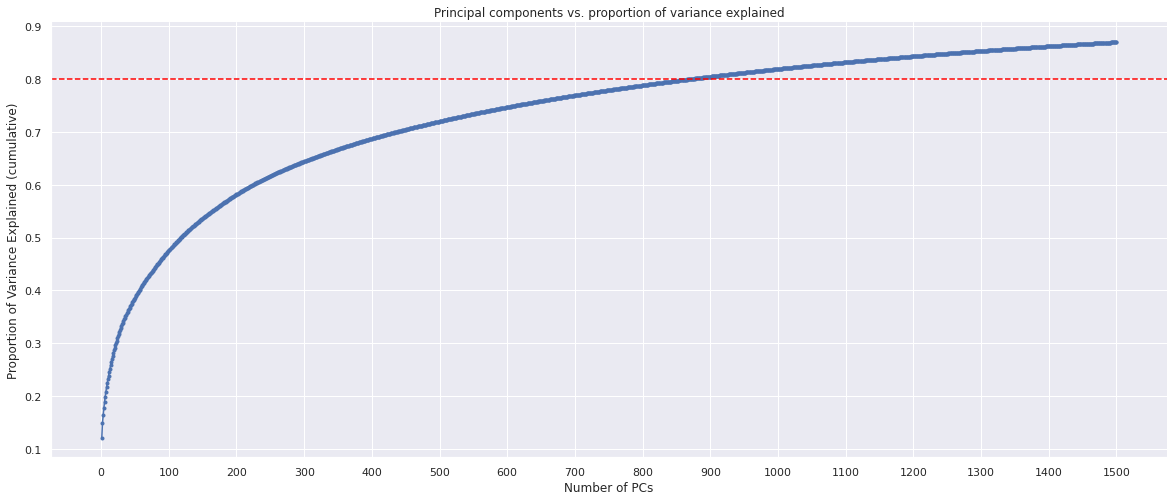

In [392]:
# Plotting the explained variance ratio (cumulative sum)
plt.figure(figsize=[20,8])
plt.plot(range(1, len(expl_var)+1), expl_var.cumsum(), marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained (cumulative)')
plt.axhline(0.8, color='red', linestyle='--')
plt.xticks(np.arange(0, 1501, 100))
plt.title('Principal components vs. proportion of variance explained')
sns.despine()
plt.show()

As we can see from the above, slightly over 850 PCs cumulatively explain 80% of the variance in data. We will proceed to transforming our X train and test data to constitute only the top (around 850) features that explains 80% of the variance in data and, in the process, identify exactly how many PCs they are.

In [133]:
# Instantiating new PCA object with target cumulative explained variance
# PCA's n_components parameter takes either integer or float values
# Integer value specifies how many PCs at a maximum we will do PCA for
# Float value specifies the portion of variance we want to cover with however many PCs needed
# Here, we want however many PCs needed that explain 80% (or 0.8) of the variance in data
sample_pca_var80pct = PCA(n_components=0.8)

# Fitting to X train data
sample_pca_var80pct.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [134]:
# Determining the no. of PCs that explained 80% variance
print(f"Number of PCs that cumulatively explain 80% variance in data: {sample_pca_var80pct.n_components_}")

Number of PCs that cumulatively explain 80% variance in data: 876


In [135]:
# Changing from float64 to float32, which take up much less memory 
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [136]:
# Transforming X train and X test
X_train_pca = sample_pca_var80pct.transform(X_train)
X_test_pca = sample_pca_var80pct.transform(X_test)

In [146]:
# Now we assign the X train and test PCAs to Pandas DataFrames
X_train_pca_df = pd.DataFrame(sample_pca_var80pct.transform(X_train), columns=['PCA%i' % i for i in range(876)], index=X_train.index)
X_test_pca_df = pd.DataFrame(sample_pca_var80pct.transform(X_test), columns=['PCA%i' % i for i in range(876)], index=X_test.index)

Finally, we print the shapes of our X train and test PCA sets as well as y train and test sets, that we will export next in order to be used as inputs to our ML models.

In [148]:
# Printing the shape of the X (PCA-transformed) and y train and test sets
print(f"Shape of the X_train (PCA-transformed) set: {X_train_pca_df.shape}")
print(f"Shape of the X_test (PCA-transformed) set: {X_test_pca_df.shape}")
print(f"Shape of the y_train set: {y_train.shape}")
print(f"Shape of the y_test set: {y_test.shape}")

Shape of the X_train (PCA-transformed) set: (55248, 876)
Shape of the X_test (PCA-transformed) set: (13812, 876)
Shape of the y_train set: (55248,)
Shape of the y_test set: (13812,)


---
# Exporting End-of-Part-3 DataFrames to Files

While a common way to go about is exporting in CSV file format, we [exported the previous final X and y train and test dataframes into pkl files](#Exporting-Train-&-Test-Sets-for-ML-Modelling-in-Part-4-of-the-Project), so we will follow suit for the PCA-version of X train and test sets.

In [149]:
# Exporting the latest version of the dataframe to pkl file
## We attempted to export in CSV file but it failed after several hours of operation, whereas exporting in pkl file took 3 seconds for this cell
X_train_pca_df.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/X_train_pca.pkl", protocol=4)
X_test_pca_df.to_pickle("/content/gdrive/MyDrive/Colab Notebooks/X_test_pca.pkl", protocol=4)